# Imports

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Define functions

In [38]:
def get_percentage_df(df):
    df_perc = df[df['verified'] == True].groupby('millis').mean()
    df_perc['percentage_solved'] = 0.0
    size = df.shape[0]
    print("Dataframe contains " + str(size) + " elements")

    for index, row in df_perc.iterrows():
        df_solved = df[df['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df.shape[0]
        df_perc.at[index, 'percentage_solved'] = percentage_solved
    df_perc.at[180000, 'percentage_solved'] = df[df['verified'] == True].shape[0] / df.shape[0]

    return df_perc

def add_percentage_df(df_perc, df_add):
    df_perc['percentage_solved_y'] = 0.0
    for index, row in df_perc.iterrows():
        df_solved = df_add[df_add['verified'] == True]
        num_solved = df_solved[df_solved['millis'] <= index].shape[0]
        percentage_solved = num_solved / df_add.shape[0]
        df_perc.at[index, 'percentage_solved_y'] = percentage_solved
    df_perc.at[180000, 'percentage_solved_y'] = df_add[df_add['verified'] == True].shape[0] / df_add.shape[0]
    return df_perc

def split_synthetic_complex(df):
    df_synthetic = df[df['name'].str.match('synth')]
    df_complex = df[~df['name'].str.match('synth')]
    return df_synthetic, df_complex

def print_results(name, df):
    print("Results for '" + name + "':")
    df_synthetic, df_complex = split_synthetic_complex(df)
    num_synthetic = df_synthetic.shape[0]
    df_synthetic_solved = df_synthetic[df_synthetic['verified'] == True]
    num_synthetic_solved = df_synthetic_solved.shape[0]
    percentage_solved = num_synthetic_solved * 100 / num_synthetic if num_synthetic else 100
    print("Synthetic: " + str(num_synthetic_solved) + "/" + str(num_synthetic) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_complex = df_complex.shape[0]
    df_complex_solved = df_complex[df_complex['verified'] == True]
    num_complex_solved = df_complex_solved.shape[0]
    percentage_solved = num_complex_solved * 100 / num_complex if num_complex else 100
    print("Complex: " + str(num_complex_solved) + "/" + str(num_complex) + " (" + str(round(percentage_solved, 2)) + "%)")

    num_overall = df.shape[0]
    df_solved = df[df['verified'] == True]
    num_solved = df_solved.shape[0]
    percentage_solved = num_solved * 100 / num_overall if num_overall else 100
    print("Overall: " + str(num_solved) + "/" + str(num_overall) + " (" + str(round(percentage_solved, 2)) + "%)")
    print()

# Load Data

In [39]:
# Create pandas dataframes from csv
df_L = pd.read_csv("../logs/v2/MainLog-2.03_LightBFS.csv", sep=",", header=0)
df_F = pd.read_csv("../logs/v2/MainLog-2.04_FullBFS.csv", sep=",", header=0)
df_F2 = pd.read_csv("../logs/v2/MainLog-2.05_FullBFS+.csv", sep=",", header=0)
df_no_preprocessing = pd.read_csv("../logs/v2/MainLog-2.07_NoPreprocessing.csv", sep=",", header=0)
df_no_flowers = pd.read_csv("../logs/v2/MainLog-2.08_NoFlowers.csv", sep=",", header=0)
df_no_forbidden = pd.read_csv("../logs/v2/MainLog-2.06_NoForbidden.csv", sep=",", header=0)

# Data for old dataset
df_L_dataset_1 = pd.read_csv("../logs/v2/MainLog-2.09_LightBFS_Dataset1.csv", sep=",", header=0)
df_V1_dataset_1 = pd.read_csv("../logs/v1/MainLog-1.1_WithTarjan.csv", sep=",", header=0)

# Detail logs
df_L_detail = pd.read_csv("../logs/v2/DetailLog-2.03_LightBFS.csv", sep=",", header=0)
df_F_detail = pd.read_csv("../logs/v2/DetailLog-2.04_FullBFS.csv", sep=",", header=0)
df_F2_detail = pd.read_csv("../logs/v2/DetailLog-2.05_FullBFS+.csv", sep=",", header=0)

# Style plot
plt.style.use('default')
font = {'size' : 32}
plt.rc('font', **font)
params = {'mathtext.default': 'regular' }
plt.rcParams.update(params)

# Print results for Light BFS

In [40]:
print_results('Light BFS', df_L)
print_results('Full BFS', df_F)
print_results('Full BFS +', df_F2)
print_results('No Preprocessing', df_no_preprocessing)
print_results('No forbidden', df_no_forbidden)
print_results('No flowers', df_no_flowers)

Results for 'Light BFS':
Synthetic: 374/441 (84.81%)
Complex: 208/220 (94.55%)
Overall: 582/661 (88.05%)

Results for 'Full BFS':
Synthetic: 378/441 (85.71%)
Complex: 210/220 (95.45%)
Overall: 588/661 (88.96%)

Results for 'Full BFS +':
Synthetic: 391/441 (88.66%)
Complex: 209/220 (95.0%)
Overall: 600/661 (90.77%)

Results for 'No Preprocessing':
Synthetic: 356/441 (80.73%)
Complex: 164/220 (74.55%)
Overall: 520/661 (78.67%)

Results for 'No forbidden':
Synthetic: 347/441 (78.68%)
Complex: 182/220 (82.73%)
Overall: 529/661 (80.03%)

Results for 'No flowers':
Synthetic: 356/441 (80.73%)
Complex: 209/220 (95.0%)
Overall: 565/661 (85.48%)



# V1 vs V2 Percentage Graph

Dataframe contains 173 elements
Dataframe contains 173 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_8372/165973097.py:32: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


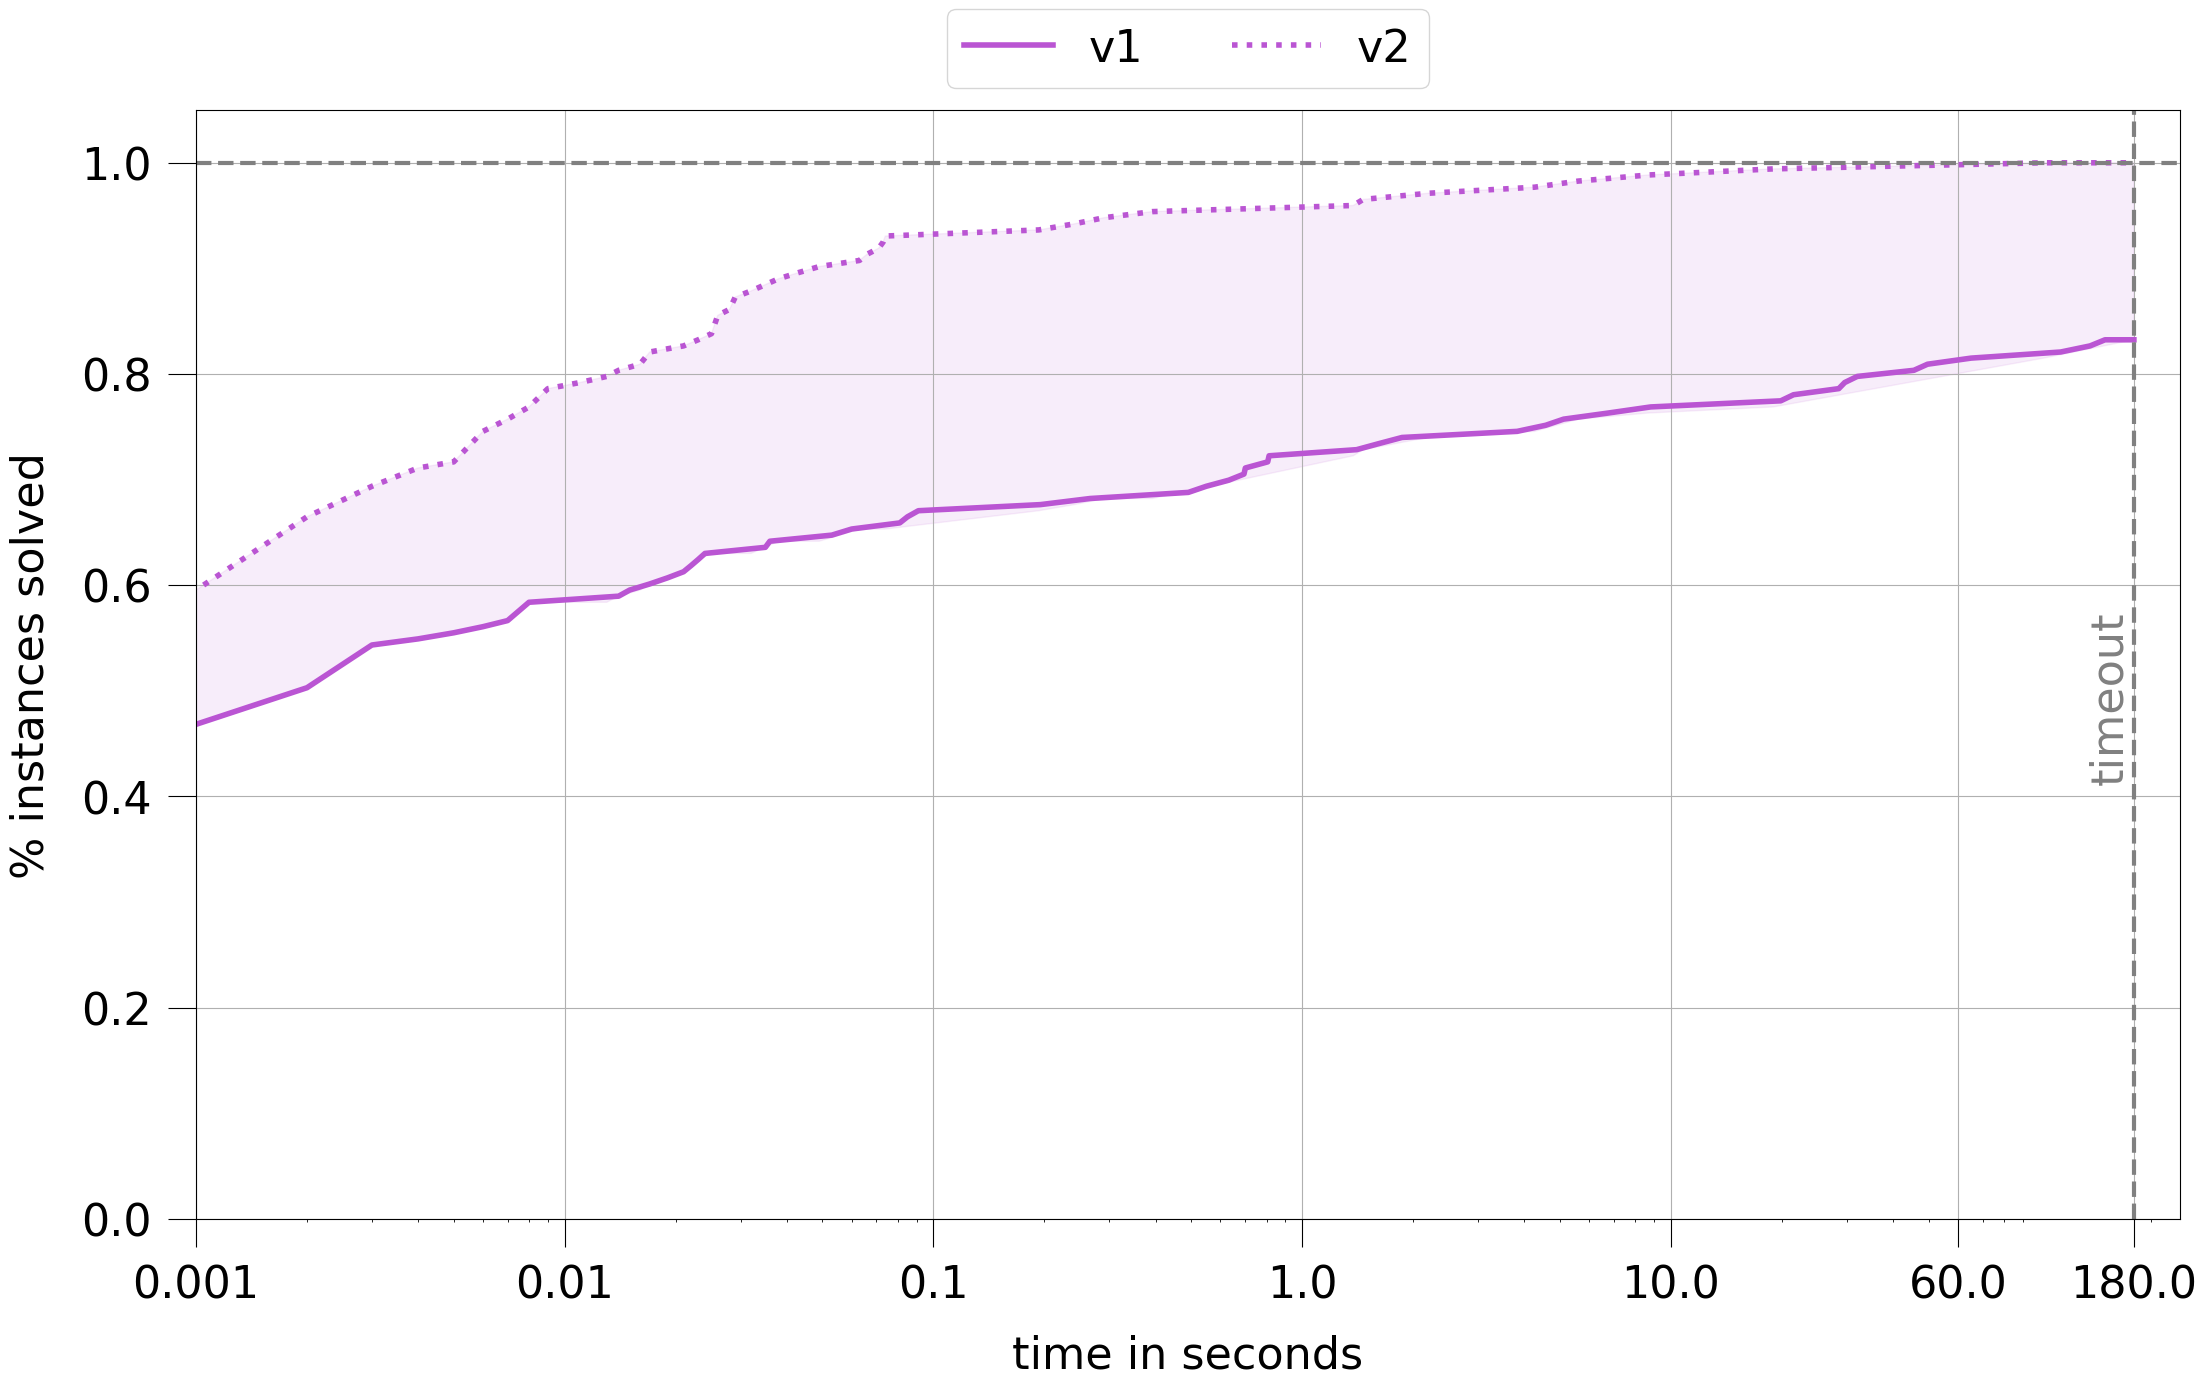

In [41]:
# Calculate percentage dataframes
df_L_perc = get_percentage_df(df_L_dataset_1)
df_V1_perc = get_percentage_df(df_V1_dataset_1)

# Add percentage values (for the area between curves)
df_L_perc = add_percentage_df(df_L_perc, df_V1_dataset_1)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_V1_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='v1')
ax.plot(df_L_perc['percentage_solved'], c='mediumorchid', linestyle=':', linewidth='4', label='v2')
# Fill area between cruves
ax.fill_between(df_L_perc.index, df_L_perc['percentage_solved'], df_L_perc['percentage_solved_y'], color='mediumorchid', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v2/LinePlotV1V2.png',  bbox_inches='tight')
fig.show()

# Preprocessing Percentage Graph

Dataframe contains 441 elements
Dataframe contains 220 elements
Dataframe contains 441 elements
Dataframe contains 220 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_8372/888624272.py:41: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


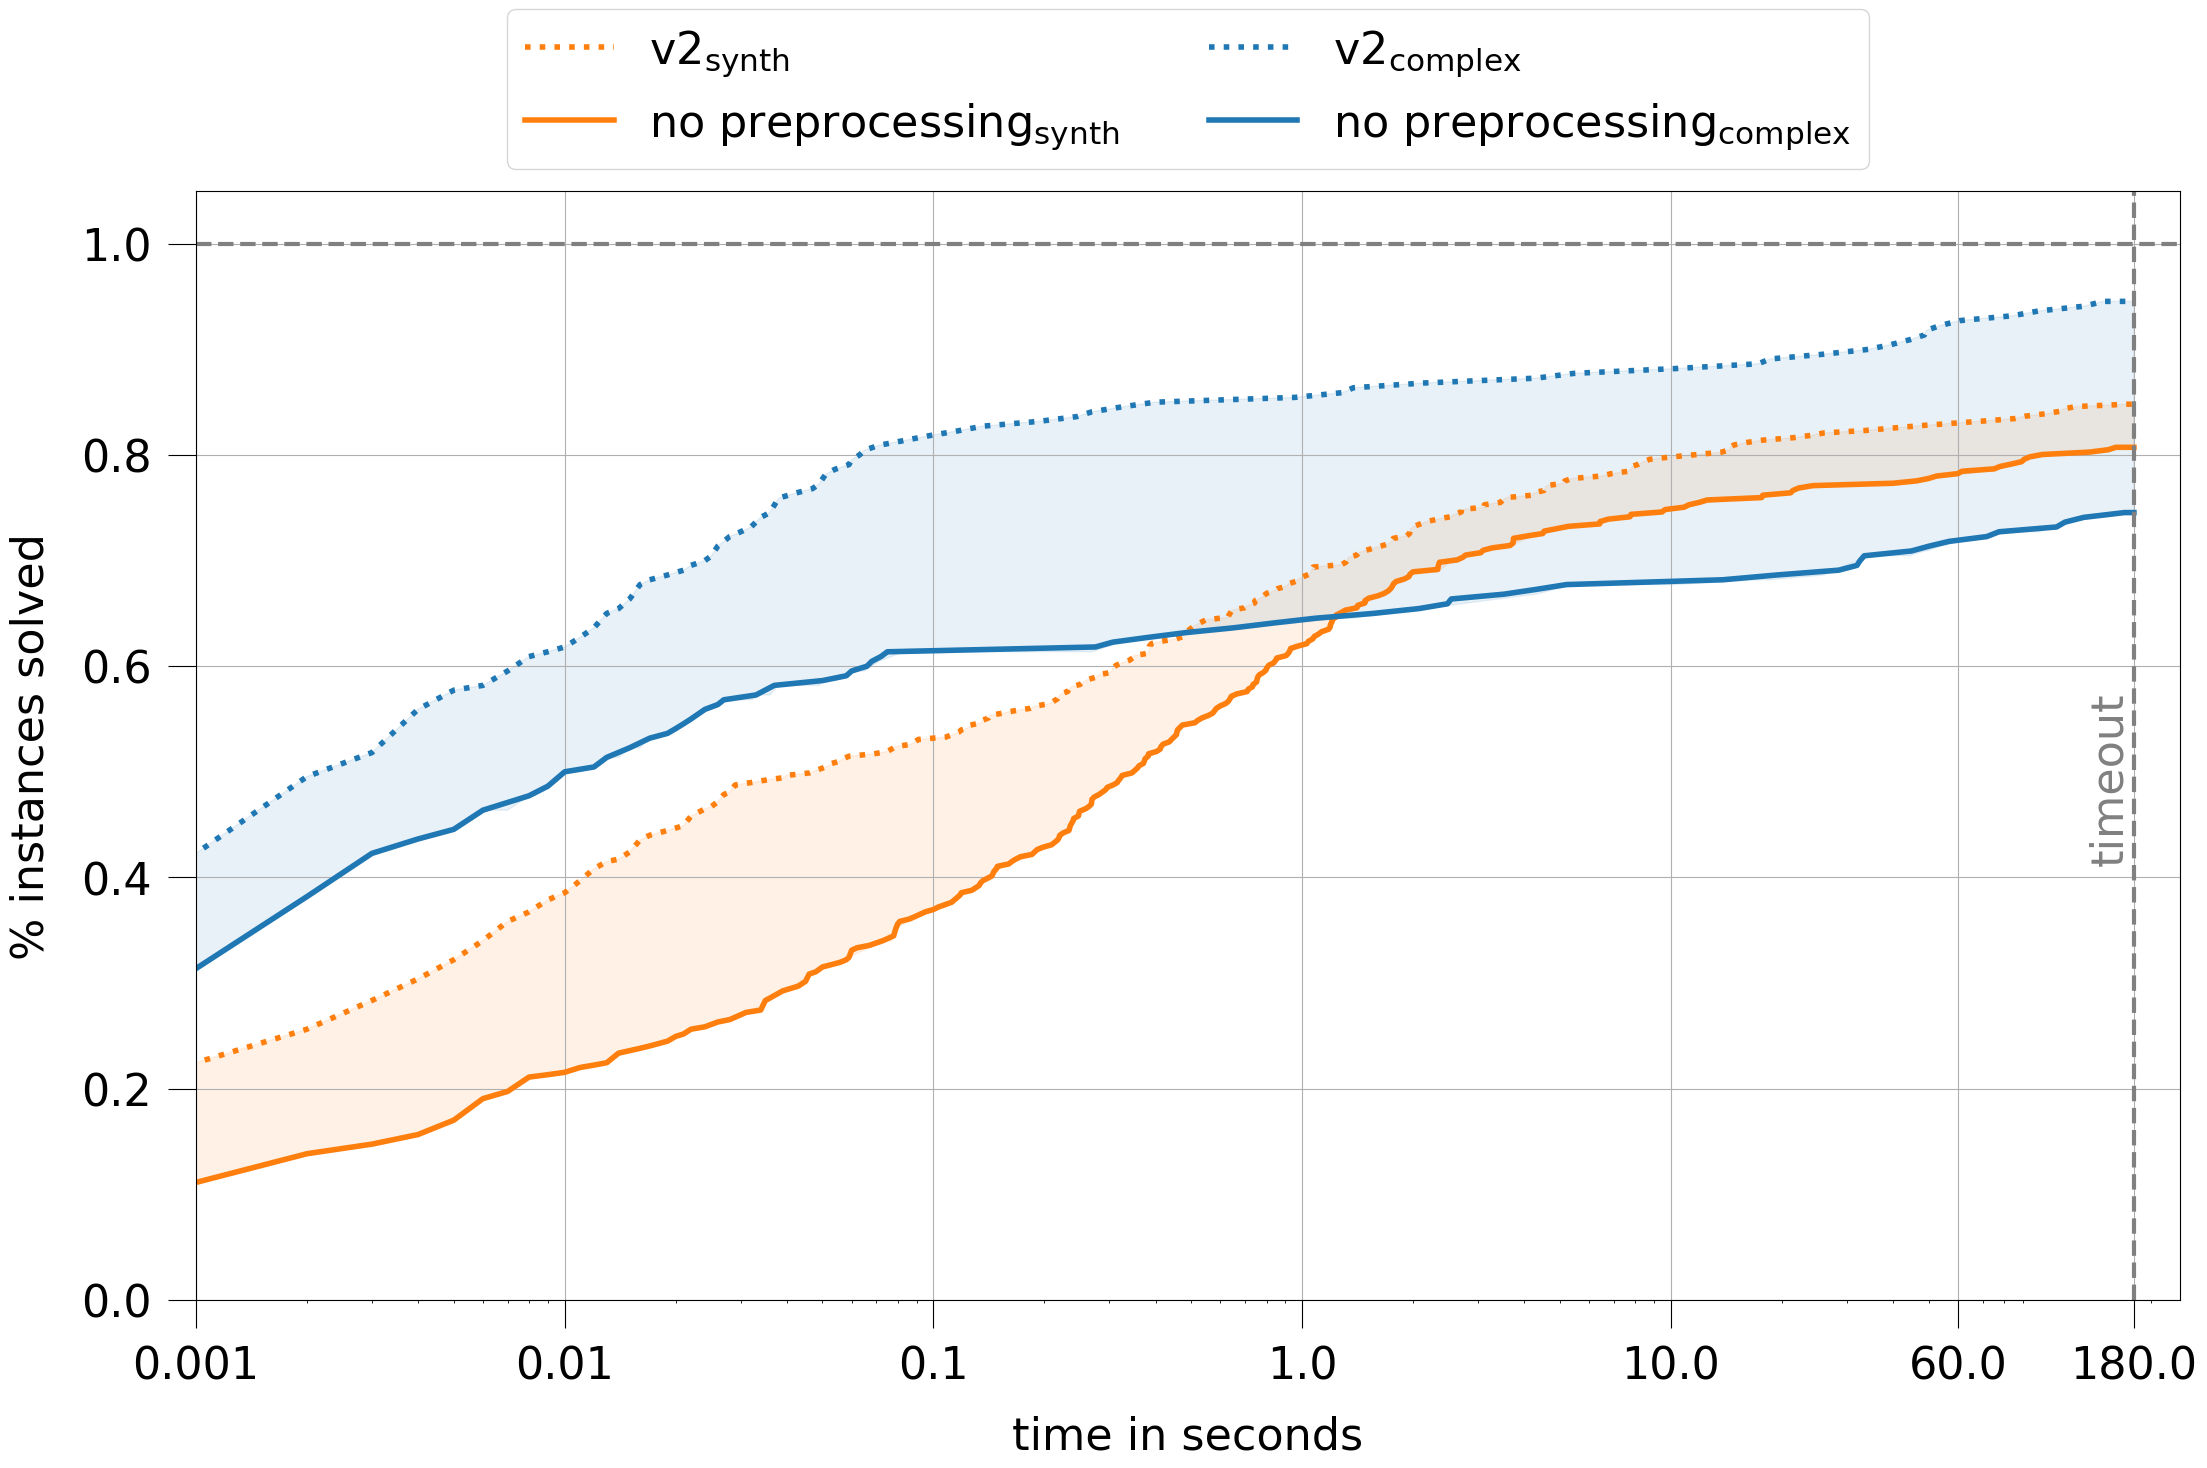

In [42]:
# Split synthetic/complex
df_L_synthetic, df_L_complex = split_synthetic_complex(df_L)
df_no_preprocessing_synthetic, df_no_preprocessing_complex = split_synthetic_complex(df_no_preprocessing)

# Calculate percentage dataframes
df_L_synthetic_perc = get_percentage_df(df_L_synthetic)
df_L_complex_perc = get_percentage_df(df_L_complex)
df_no_preprocessing_synthetic_perc = get_percentage_df(df_no_preprocessing_synthetic)
df_no_preprocessing_complex_perc = get_percentage_df(df_no_preprocessing_complex)

# Add percentage values (for the area between curves)
df_L_synthetic_perc = add_percentage_df(df_L_synthetic_perc, df_no_preprocessing_synthetic)
df_L_complex_perc = add_percentage_df(df_L_complex_perc, df_no_preprocessing_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_L_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', linestyle=':', label='$v2_{synth}$')
ax.plot(df_no_preprocessing_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='no $preprocessing_{synth}$')
ax.plot(df_L_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', linestyle=':', label='$v2_{complex}$')
ax.plot(df_no_preprocessing_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='no $preprocessing_{complex}$')
# Fill area between curves
ax.fill_between(df_L_synthetic_perc.index, df_L_synthetic_perc['percentage_solved'], df_L_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_L_complex_perc.index, df_L_complex_perc['percentage_solved'], df_L_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)
ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v2/LinePlotPreprocessing.png',  bbox_inches='tight')
fig.show()

# Preprocessing N Scatter Plot

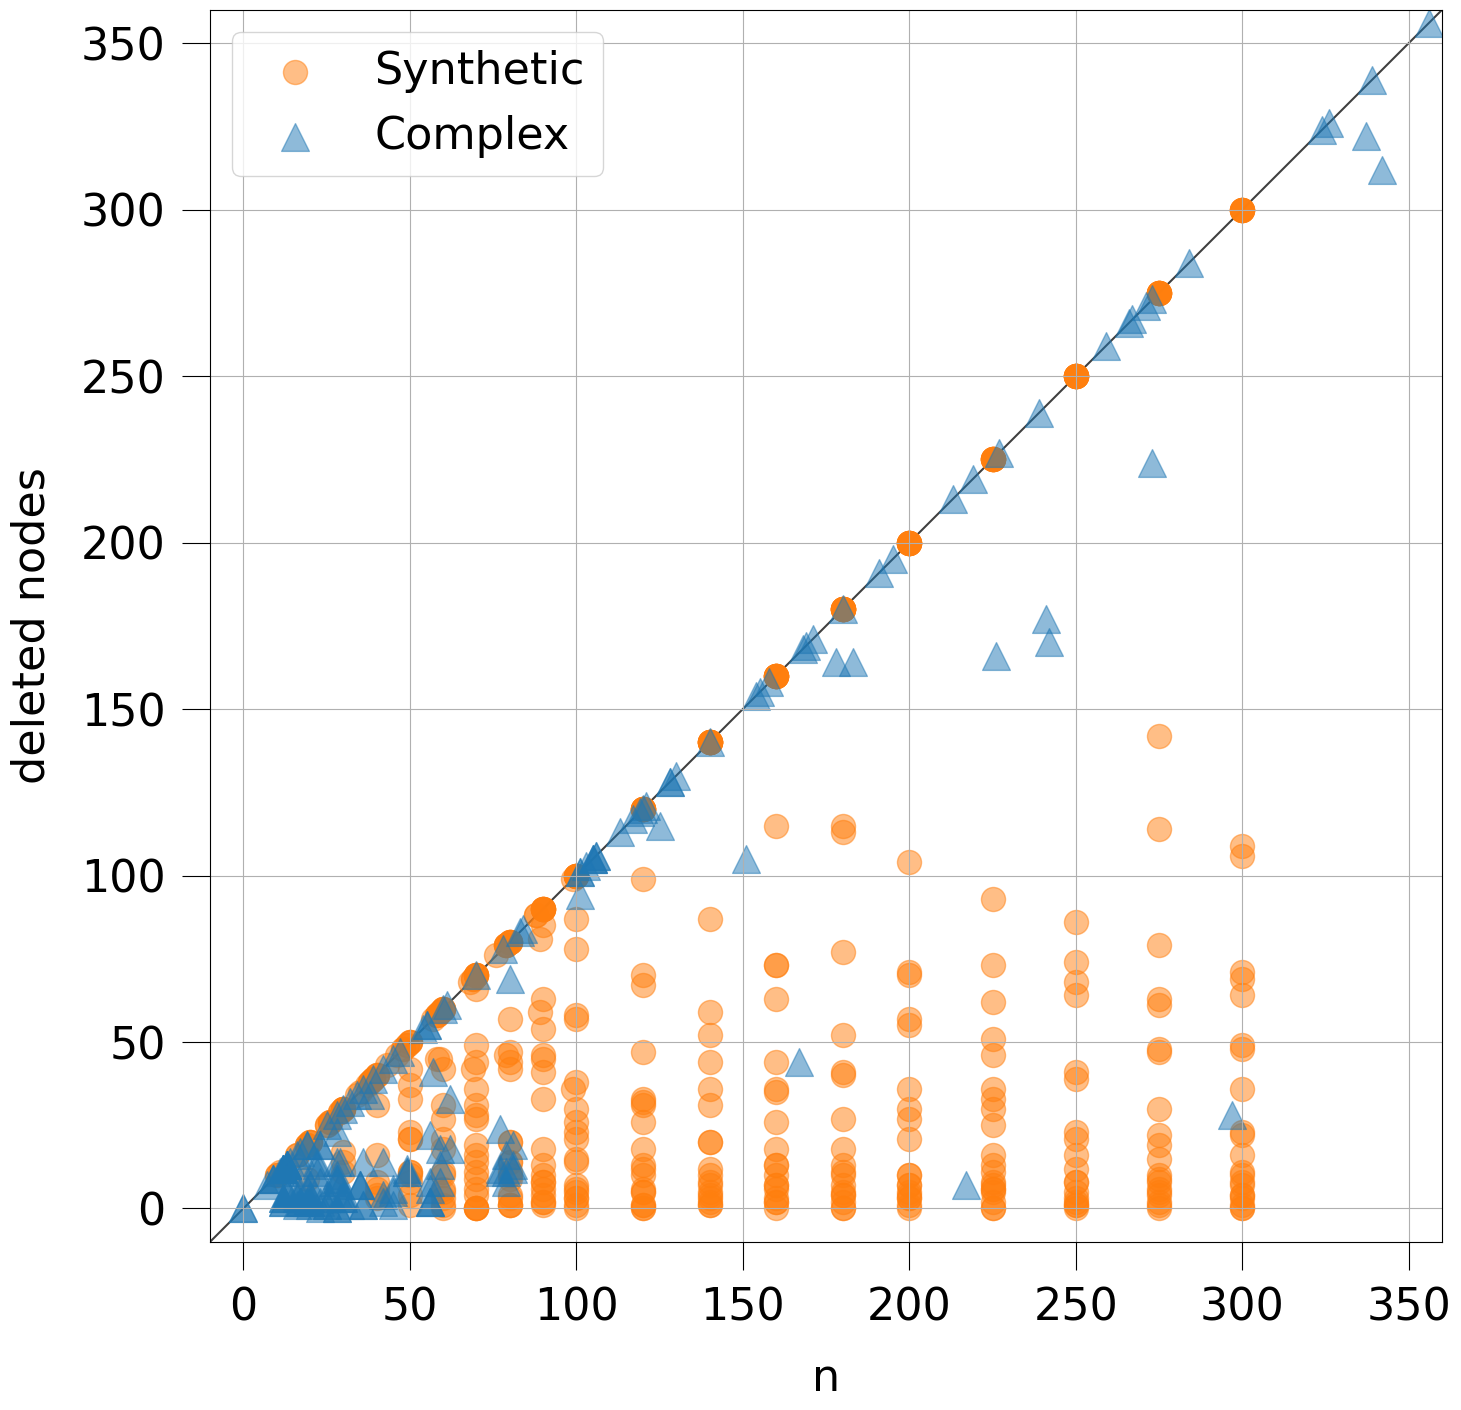

In [43]:
df_F2_synthetic, df_F2_complex = split_synthetic_complex(df_F2)

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(df_F2_synthetic['n'], df_F2_synthetic['pre_deleted_nodes'], c='tab:orange', marker='o', alpha=0.5, s=300, label='Synthetic')
ax.scatter(df_F2_complex['n'], df_F2_complex['pre_deleted_nodes'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('n', labelpad=20)
ax.set_ylabel('deleted nodes', labelpad=20)
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.legend()
ax.grid()

# diagonal line
x = np.array([1,1000])
y = np.array([1,1000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/v2/ScatterPlotPreprocessing.png',  bbox_inches='tight')
ax.set_xlim([-10, 360])
ax.set_ylim([-10, 360])
fig.savefig('plots/v2/ScatterPlotPreprocessingZoom.png',  bbox_inches='tight')

# Forbidden Nodes Percentage Plot

Dataframe contains 441 elements
Dataframe contains 220 elements
Dataframe contains 441 elements
Dataframe contains 220 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_8372/3388745087.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


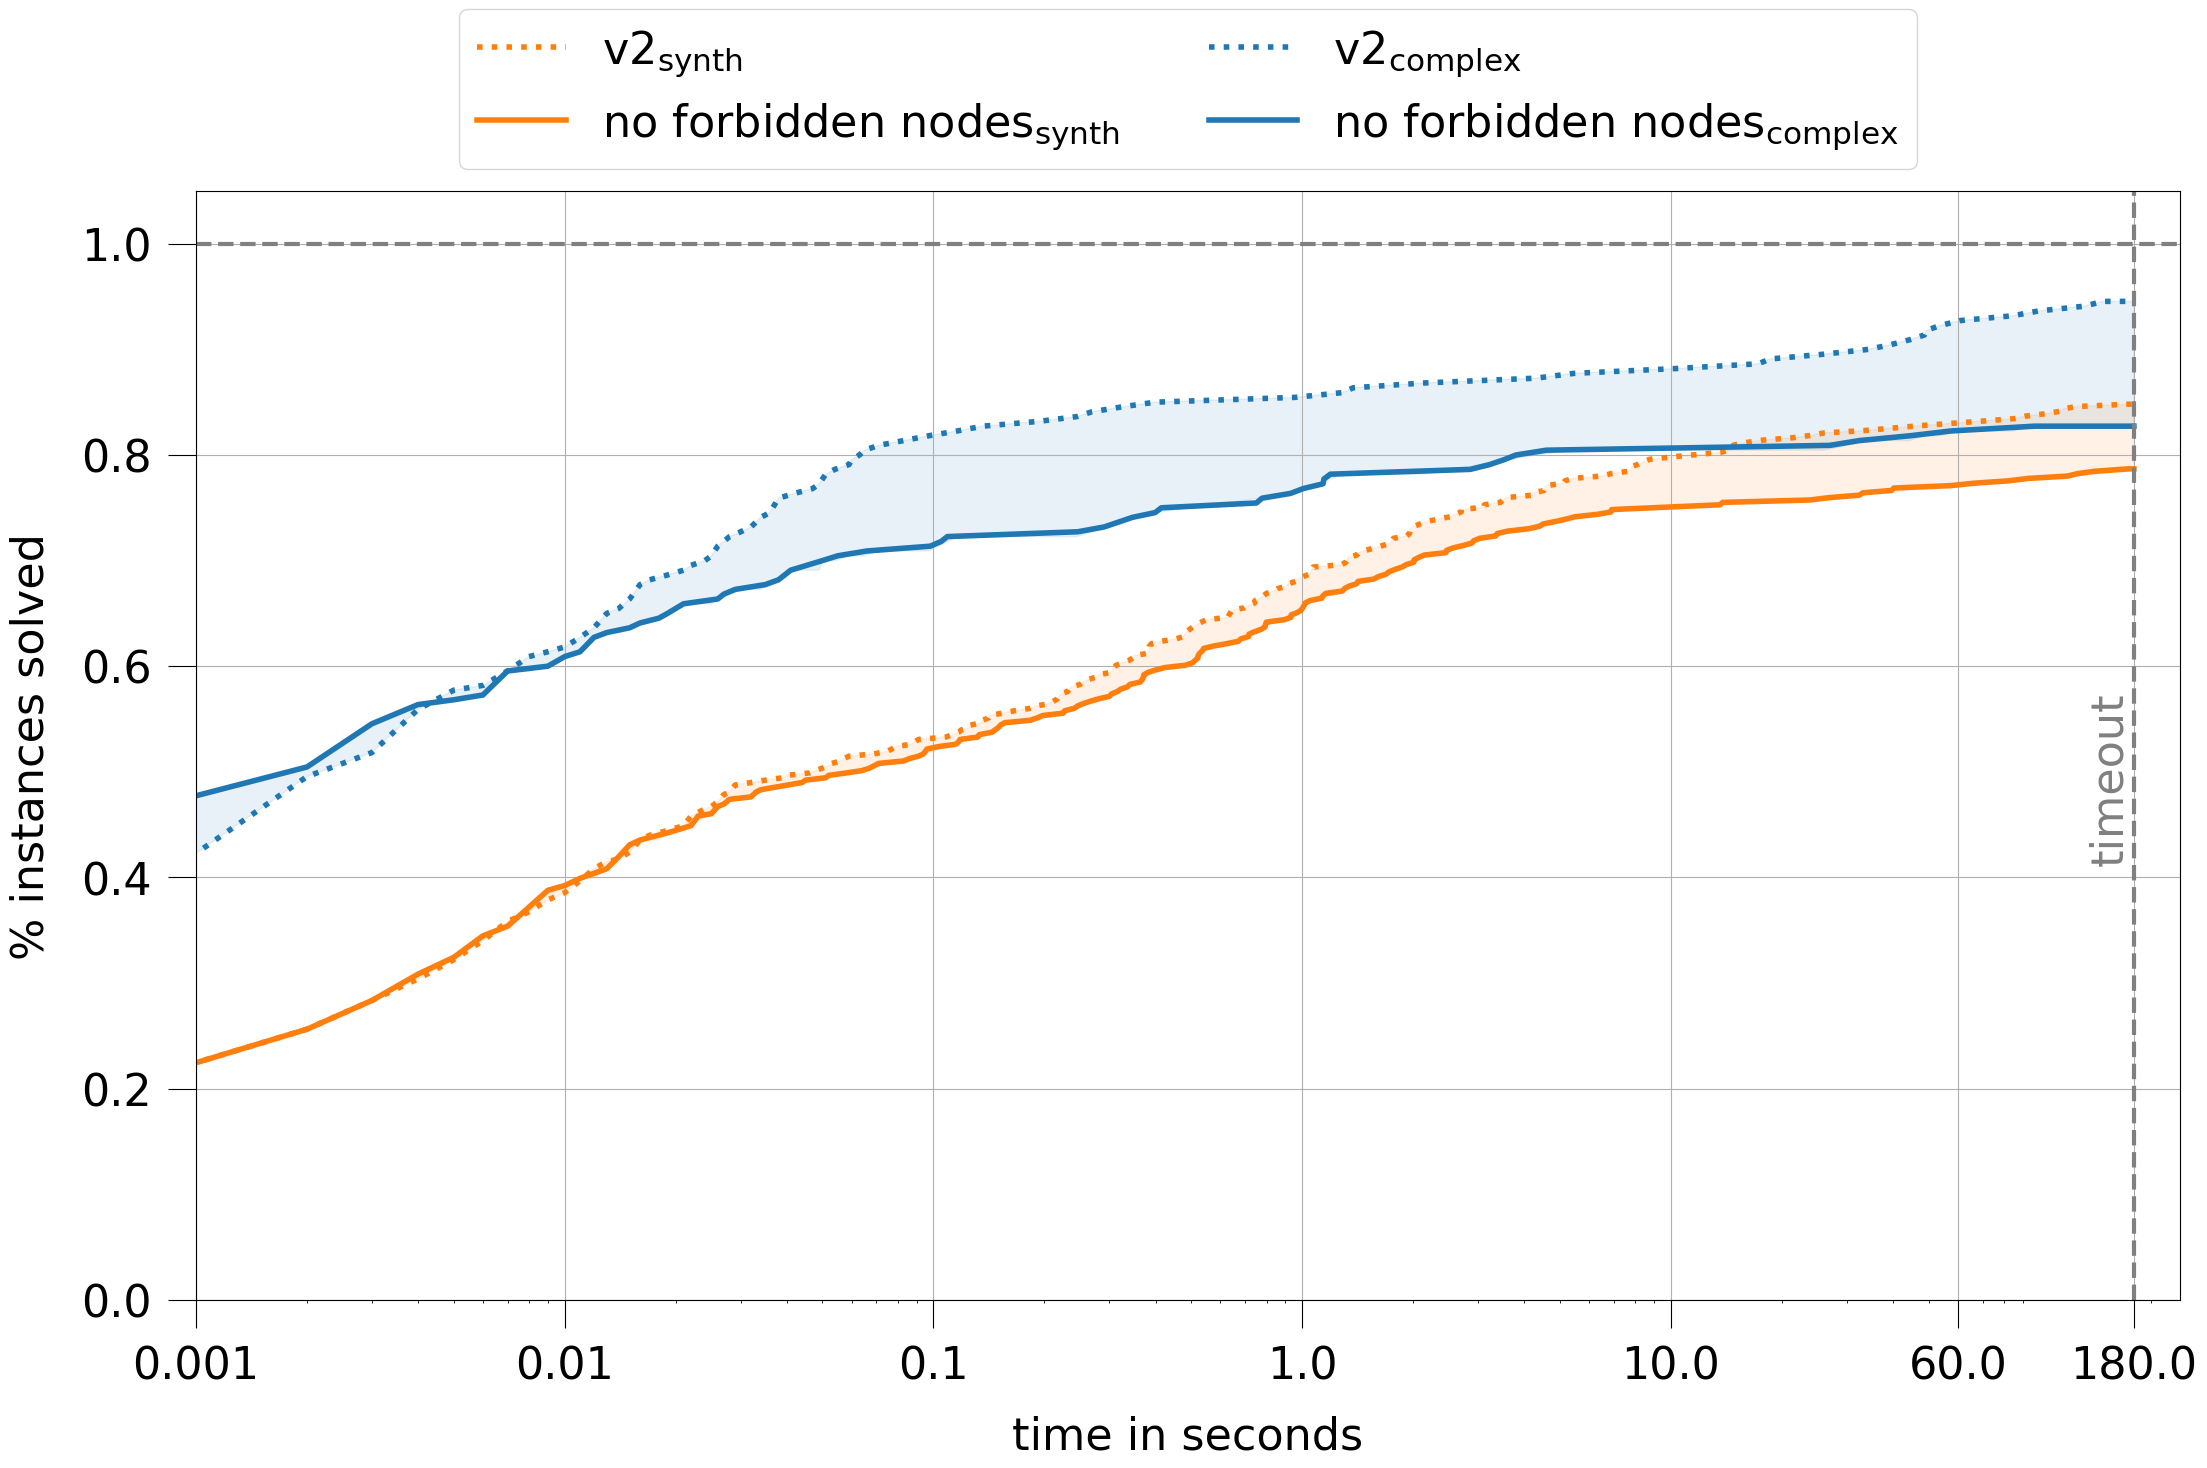

In [44]:
# Split synthetic/complex
df_L_synthetic, df_L_complex = split_synthetic_complex(df_L)
df_no_forbidden_synthetic, df_no_forbidden_complex = split_synthetic_complex(df_no_forbidden)

# Calculate percentage dataframes
df_L_synthetic_perc = get_percentage_df(df_L_synthetic)
df_L_complex_perc = get_percentage_df(df_L_complex)
df_no_forbidden_synthetic_perc = get_percentage_df(df_no_forbidden_synthetic)
df_no_forbidden_complex_perc = get_percentage_df(df_no_forbidden_complex)

# Add percentage values (for the area between curves)
df_L_synthetic_perc = add_percentage_df(df_L_synthetic_perc, df_no_forbidden_synthetic)
df_L_complex_perc = add_percentage_df(df_L_complex_perc, df_no_forbidden_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_L_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='$v2_{synth}$')
ax.plot(df_no_forbidden_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='no forbidden $nodes_{synth}$')
ax.plot(df_L_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='$v2_{complex}$')
ax.plot(df_no_forbidden_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='no forbidden $nodes_{complex}$')
# Fill area between cruves
ax.fill_between(df_L_synthetic_perc.index, df_L_synthetic_perc['percentage_solved'], df_L_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_L_complex_perc.index, df_L_complex_perc['percentage_solved'], df_L_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v2/LinePlotForbiddenNodes.png',  bbox_inches='tight')
fig.show()

# Forbidden Nodes Scatter Plot

C:\Users\lenna\AppData\Local\Temp/ipykernel_8372/3828739995.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


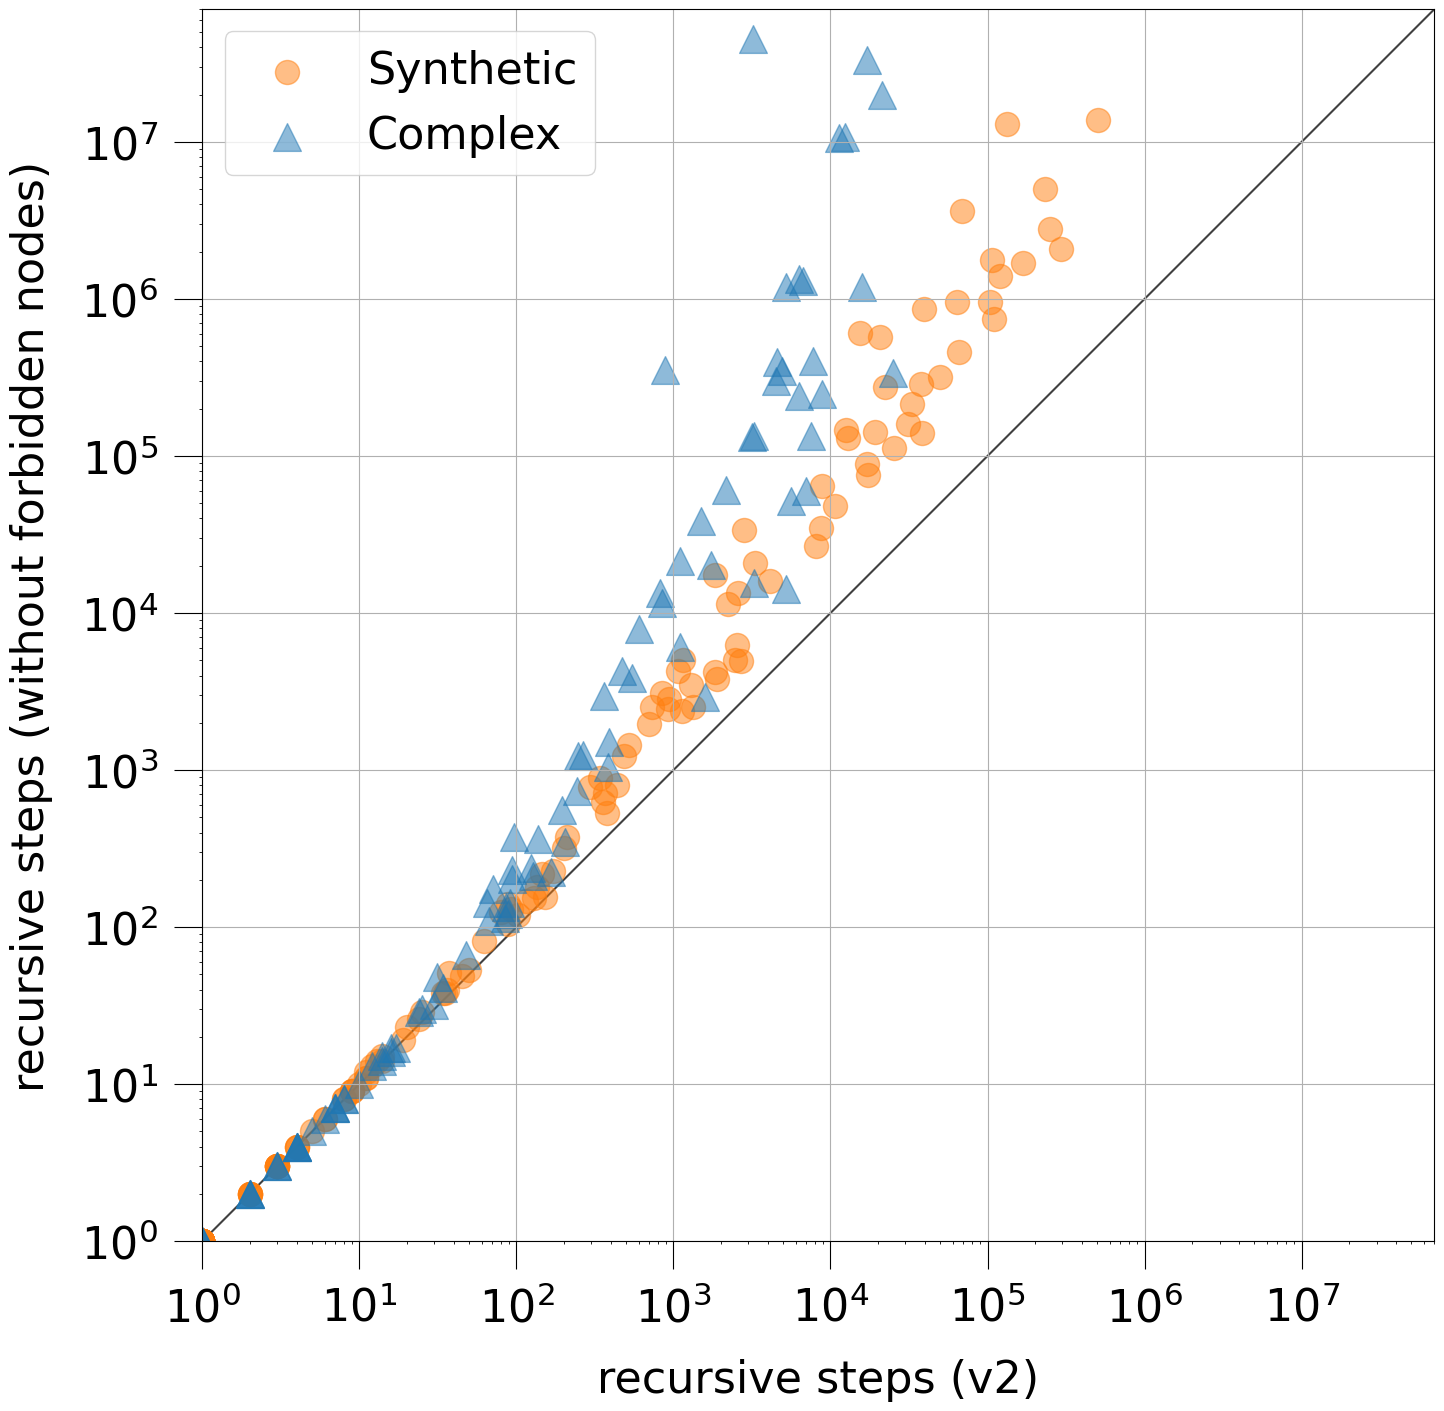

In [45]:
df_merge = df_L.merge(df_no_forbidden, on='name', how='inner')
df_merge = df_merge[df_merge['verified_x'] == True]
df_merge = df_merge[df_merge['verified_y'] == True]
df_merge_synthetic, df_merge_complex = split_synthetic_complex(df_merge)

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(df_merge_synthetic['recursive_steps_x'], df_merge_synthetic['recursive_steps_y'], c='tab:orange', marker='o', alpha=0.5, s=300, label='Synthetic')
ax.scatter(df_merge_complex['recursive_steps_x'], df_merge_complex['recursive_steps_y'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('optimal k')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlim([1, 70000000])
ax.set_ylim([1, 70000000])
ax.set_xlabel('recursive steps (v2)', labelpad=20)
ax.set_ylabel('recursive steps (without forbidden nodes)', labelpad=20)
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.legend()
ax.grid()

# diagonal line
x = np.array([1,70000000])
y = np.array([1,70000000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/v2/ScatterPlotForbiddenNodes.png',  bbox_inches='tight')
fig.show()

# Flowers Percentage Graph

Dataframe contains 441 elements
Dataframe contains 220 elements
Dataframe contains 441 elements
Dataframe contains 220 elements


C:\Users\lenna\AppData\Local\Temp/ipykernel_8372/3791064277.py:42: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


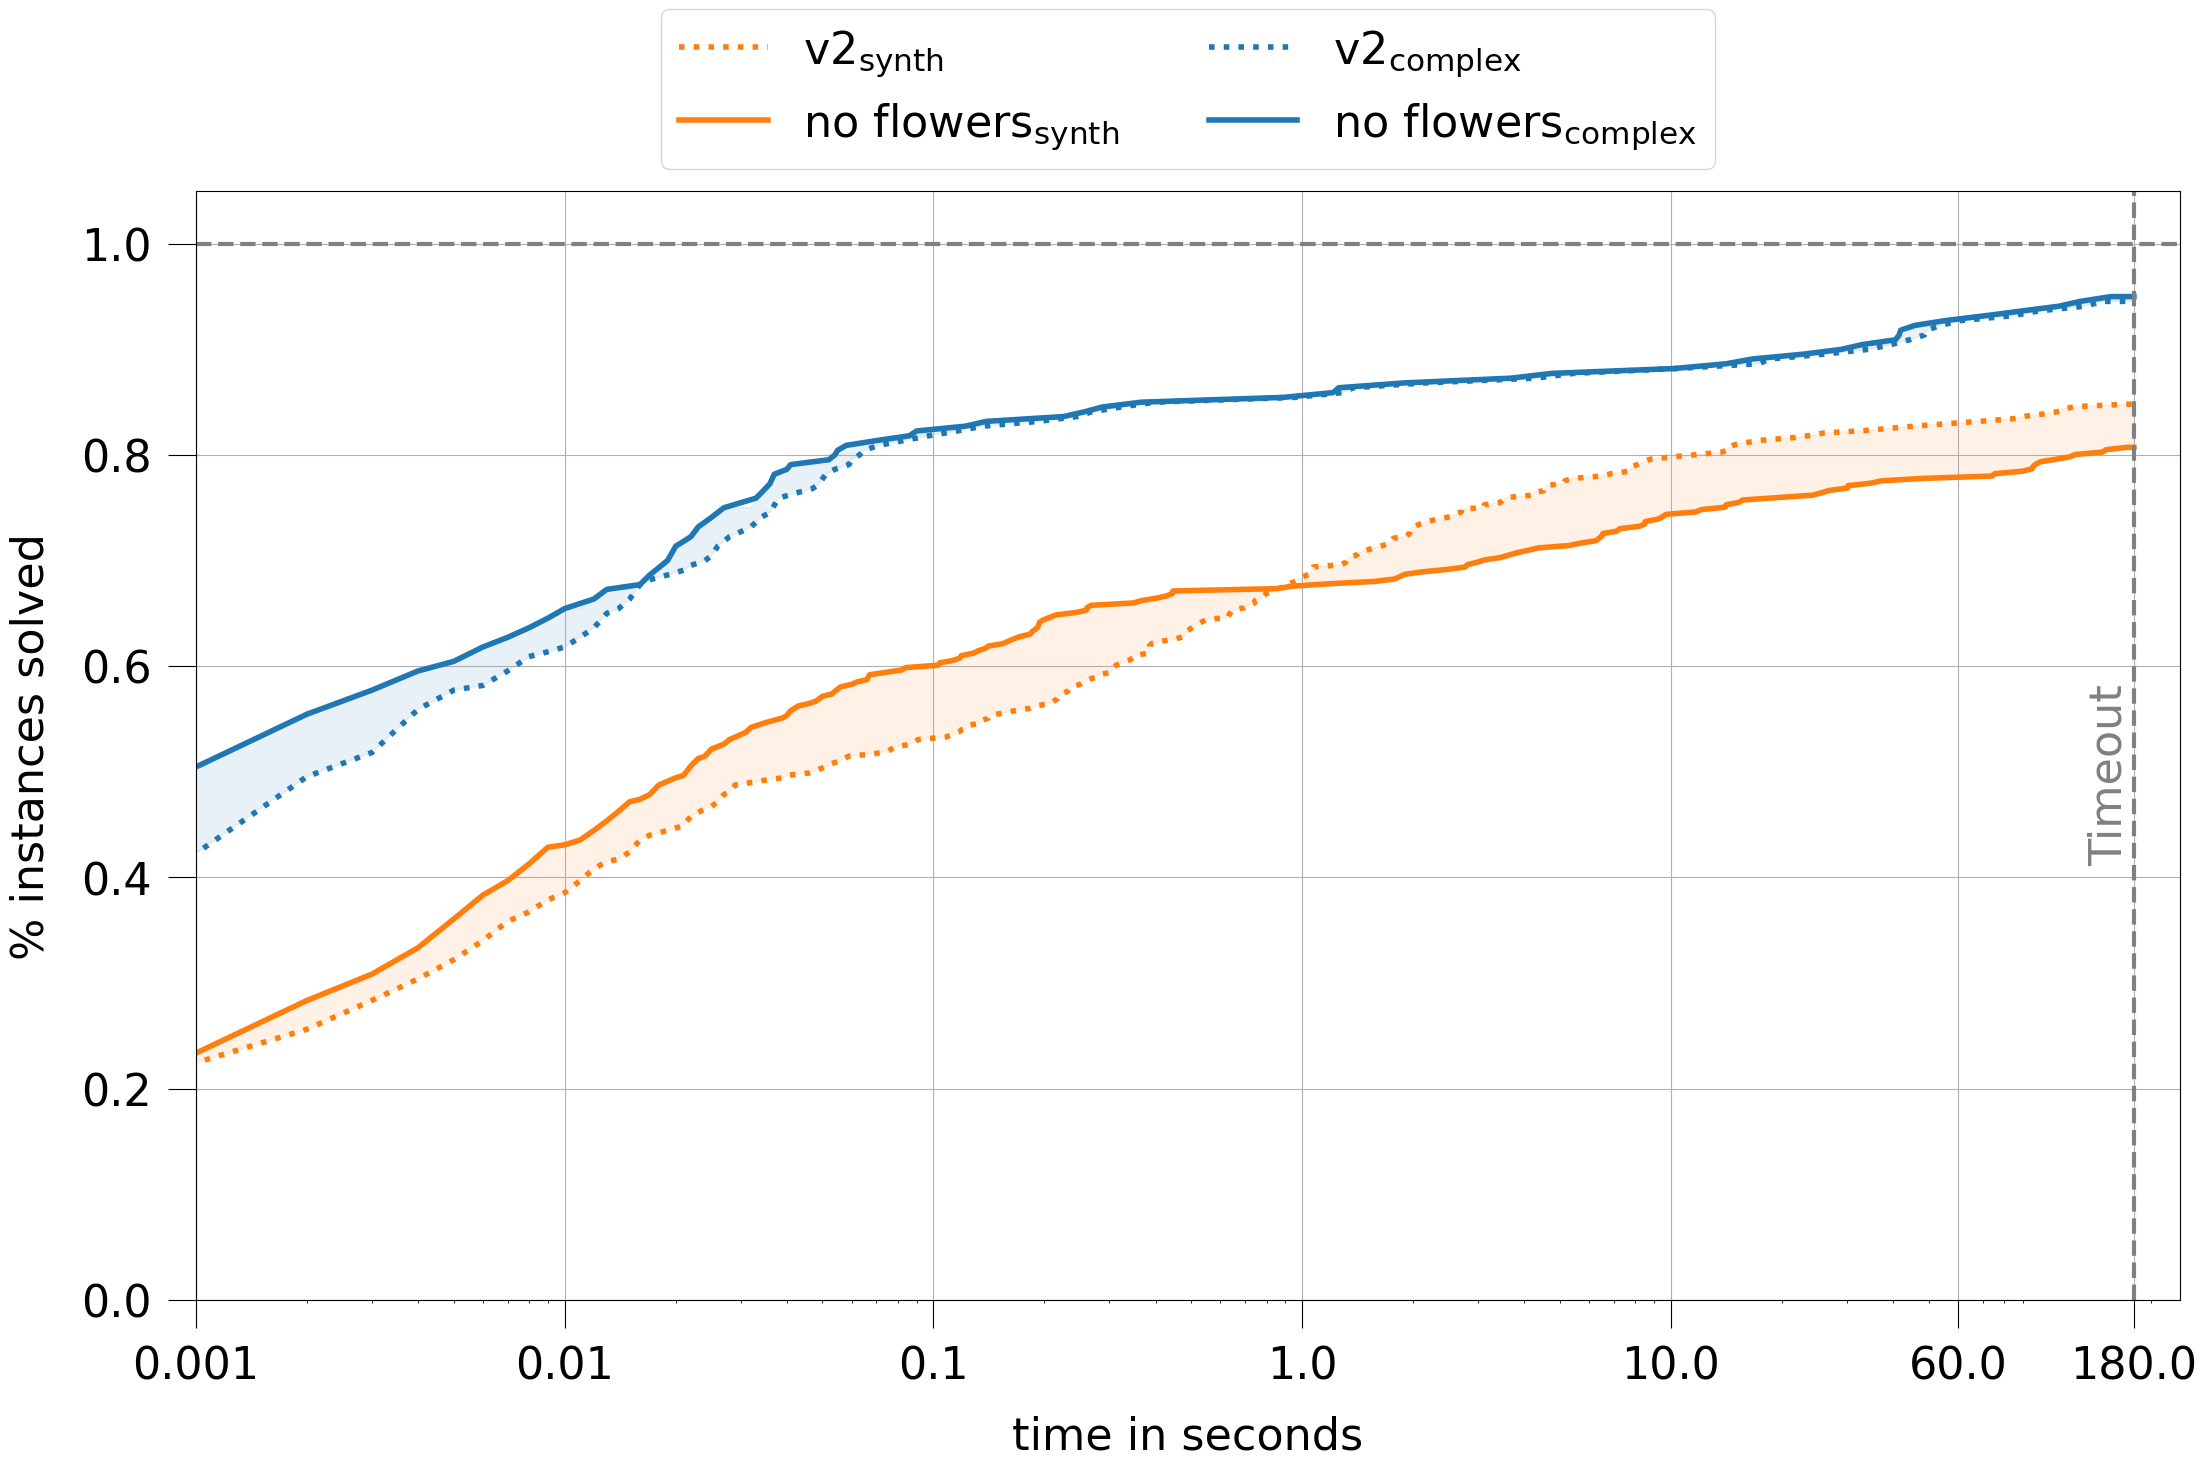

In [46]:
# Split synthetic/complex
df_L_synthetic, df_L_complex = split_synthetic_complex(df_L)
df_no_flowers_synthetic, df_no_flowers_complex = split_synthetic_complex(df_no_flowers)

# Calculate percentage dataframes
df_L_synthetic_perc = get_percentage_df(df_L_synthetic)
df_L_complex_perc = get_percentage_df(df_L_complex)
df_no_flowers_synthetic_perc = get_percentage_df(df_no_flowers_synthetic)
df_no_flowers_complex_perc = get_percentage_df(df_no_flowers_complex)

# Add percentage values (for the area between curves)
df_L_synthetic_perc = add_percentage_df(df_L_synthetic_perc, df_no_flowers_synthetic)
df_L_complex_perc = add_percentage_df(df_L_complex_perc, df_no_flowers_complex)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_L_synthetic_perc['percentage_solved'], c='tab:orange', linestyle=':', linewidth='4', label='$v2_{synth}$')
ax.plot(df_no_flowers_synthetic_perc['percentage_solved'], c='tab:orange', linewidth='4', label='no $flowers_{synth}$')
ax.plot(df_L_complex_perc['percentage_solved'], c='tab:blue', linestyle=':', linewidth='4', label='$v2_{complex}$')
ax.plot(df_no_flowers_complex_perc['percentage_solved'], c='tab:blue', linewidth='4', label='no $flowers_{complex}$')
# Fill area between curves
ax.fill_between(df_L_synthetic_perc.index, df_L_synthetic_perc['percentage_solved'], df_L_synthetic_perc['percentage_solved_y'], color='tab:orange', alpha=0.1)
ax.fill_between(df_L_complex_perc.index, df_L_complex_perc['percentage_solved'], df_L_complex_perc['percentage_solved_y'], color='tab:blue', alpha=0.1)

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "Timeout", color='gray', rotation='vertical')

fig.savefig('plots/v2/LinePlotFlowers.png',  bbox_inches='tight')
fig.show()

# Flower Scatter Plot

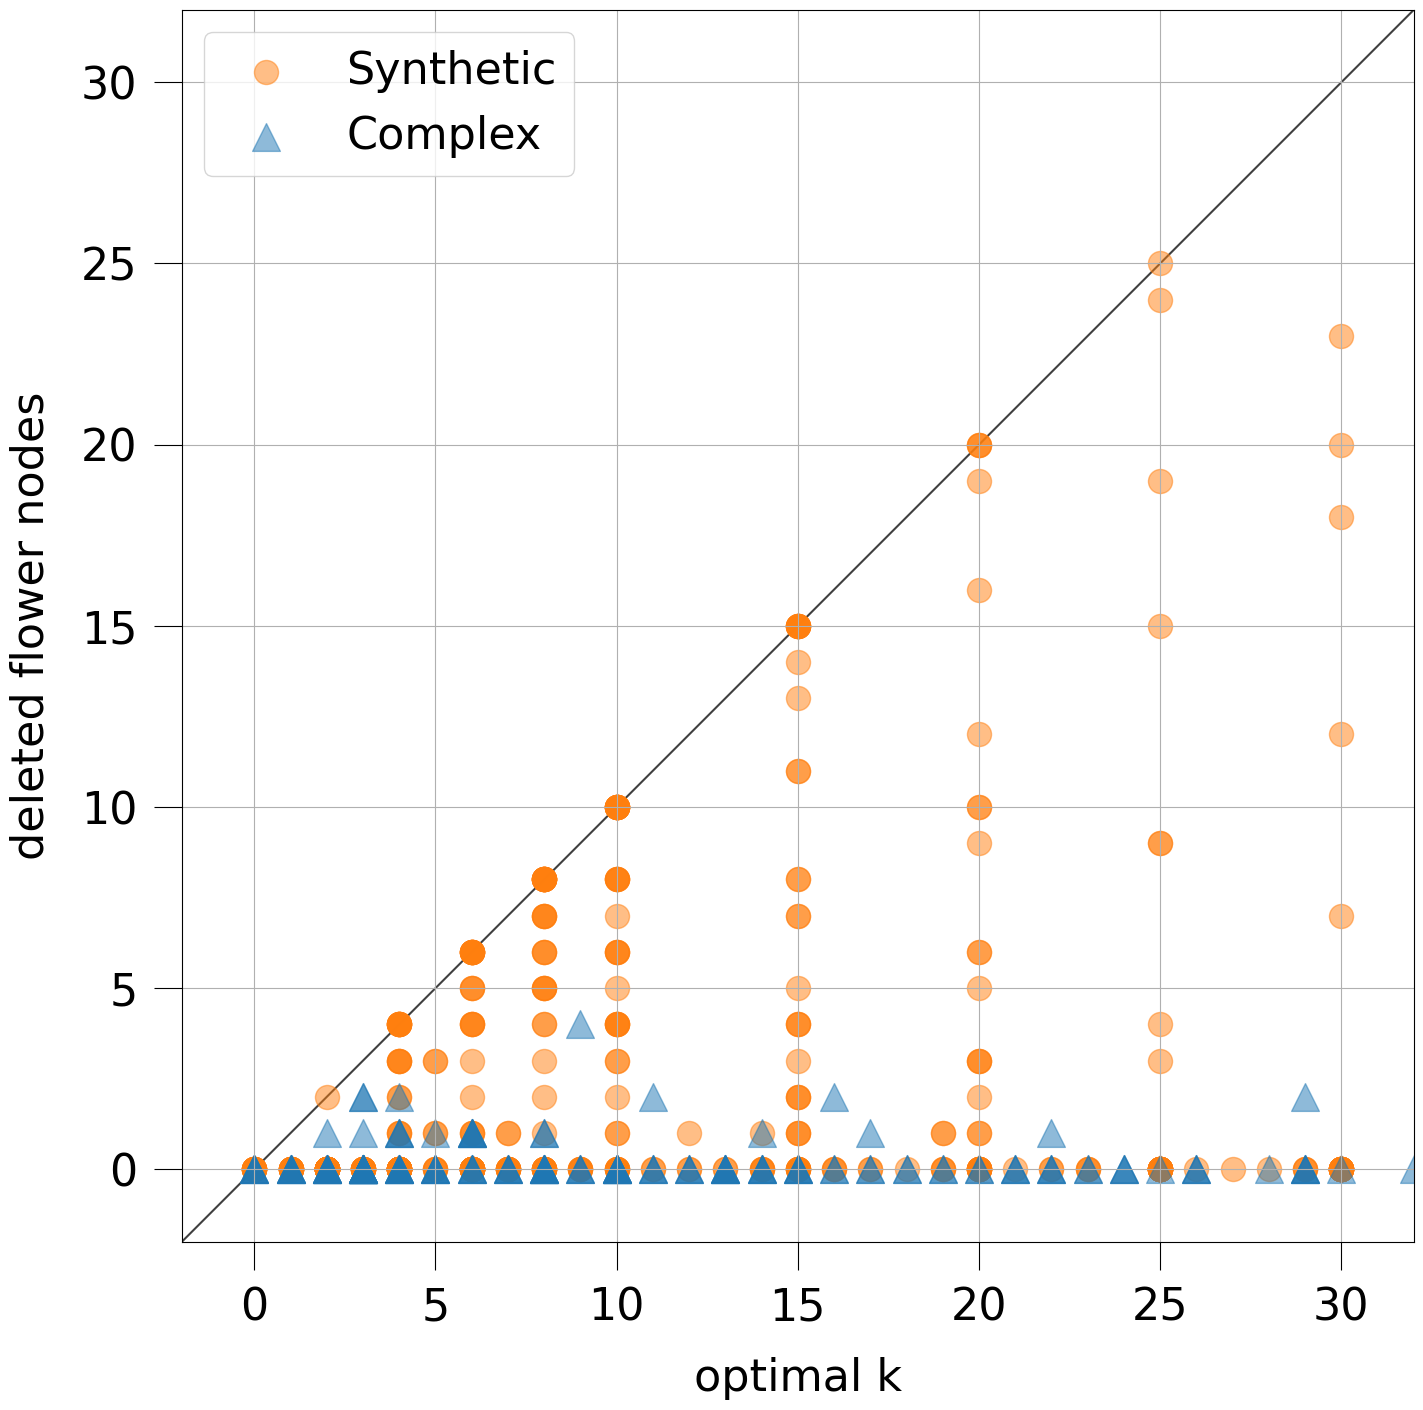

In [47]:
df_F2_synthetic, df_F2_complex = split_synthetic_complex(df_F2)

fig, ax = plt.subplots(figsize=(16, 16))
ax.scatter(df_F2_synthetic['k_optimal'], df_F2_synthetic['flower_deleted_nodes'], c='tab:orange', marker='o', alpha=0.5, s=300, label='Synthetic')
ax.scatter(df_F2_complex['k_optimal'], df_F2_complex['flower_deleted_nodes'], c='tab:blue', marker='^', alpha=0.5, s=400, label='Complex')

ax.set_xlabel('optimal k', labelpad=20)
ax.set_ylabel('deleted flower nodes', labelpad=20)
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.legend()
ax.grid()

# diagonal line
x = np.array([1,1000])
y = np.array([1,1000])
lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),
    np.max([ax.get_xlim(), ax.get_ylim()]),
]
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)

fig.savefig('plots/v2/ScatterPlotFlowers.png',  bbox_inches='tight')
ax.set_xlim([-2, 32])
ax.set_ylim([-2, 32])
fig.savefig('plots/v2/ScatterPlotFlowersZoom.png',  bbox_inches='tight')

# Line Plot Cycle VS Branch Size

C:\Users\lenna\AppData\Local\Temp/ipykernel_8372/905286173.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


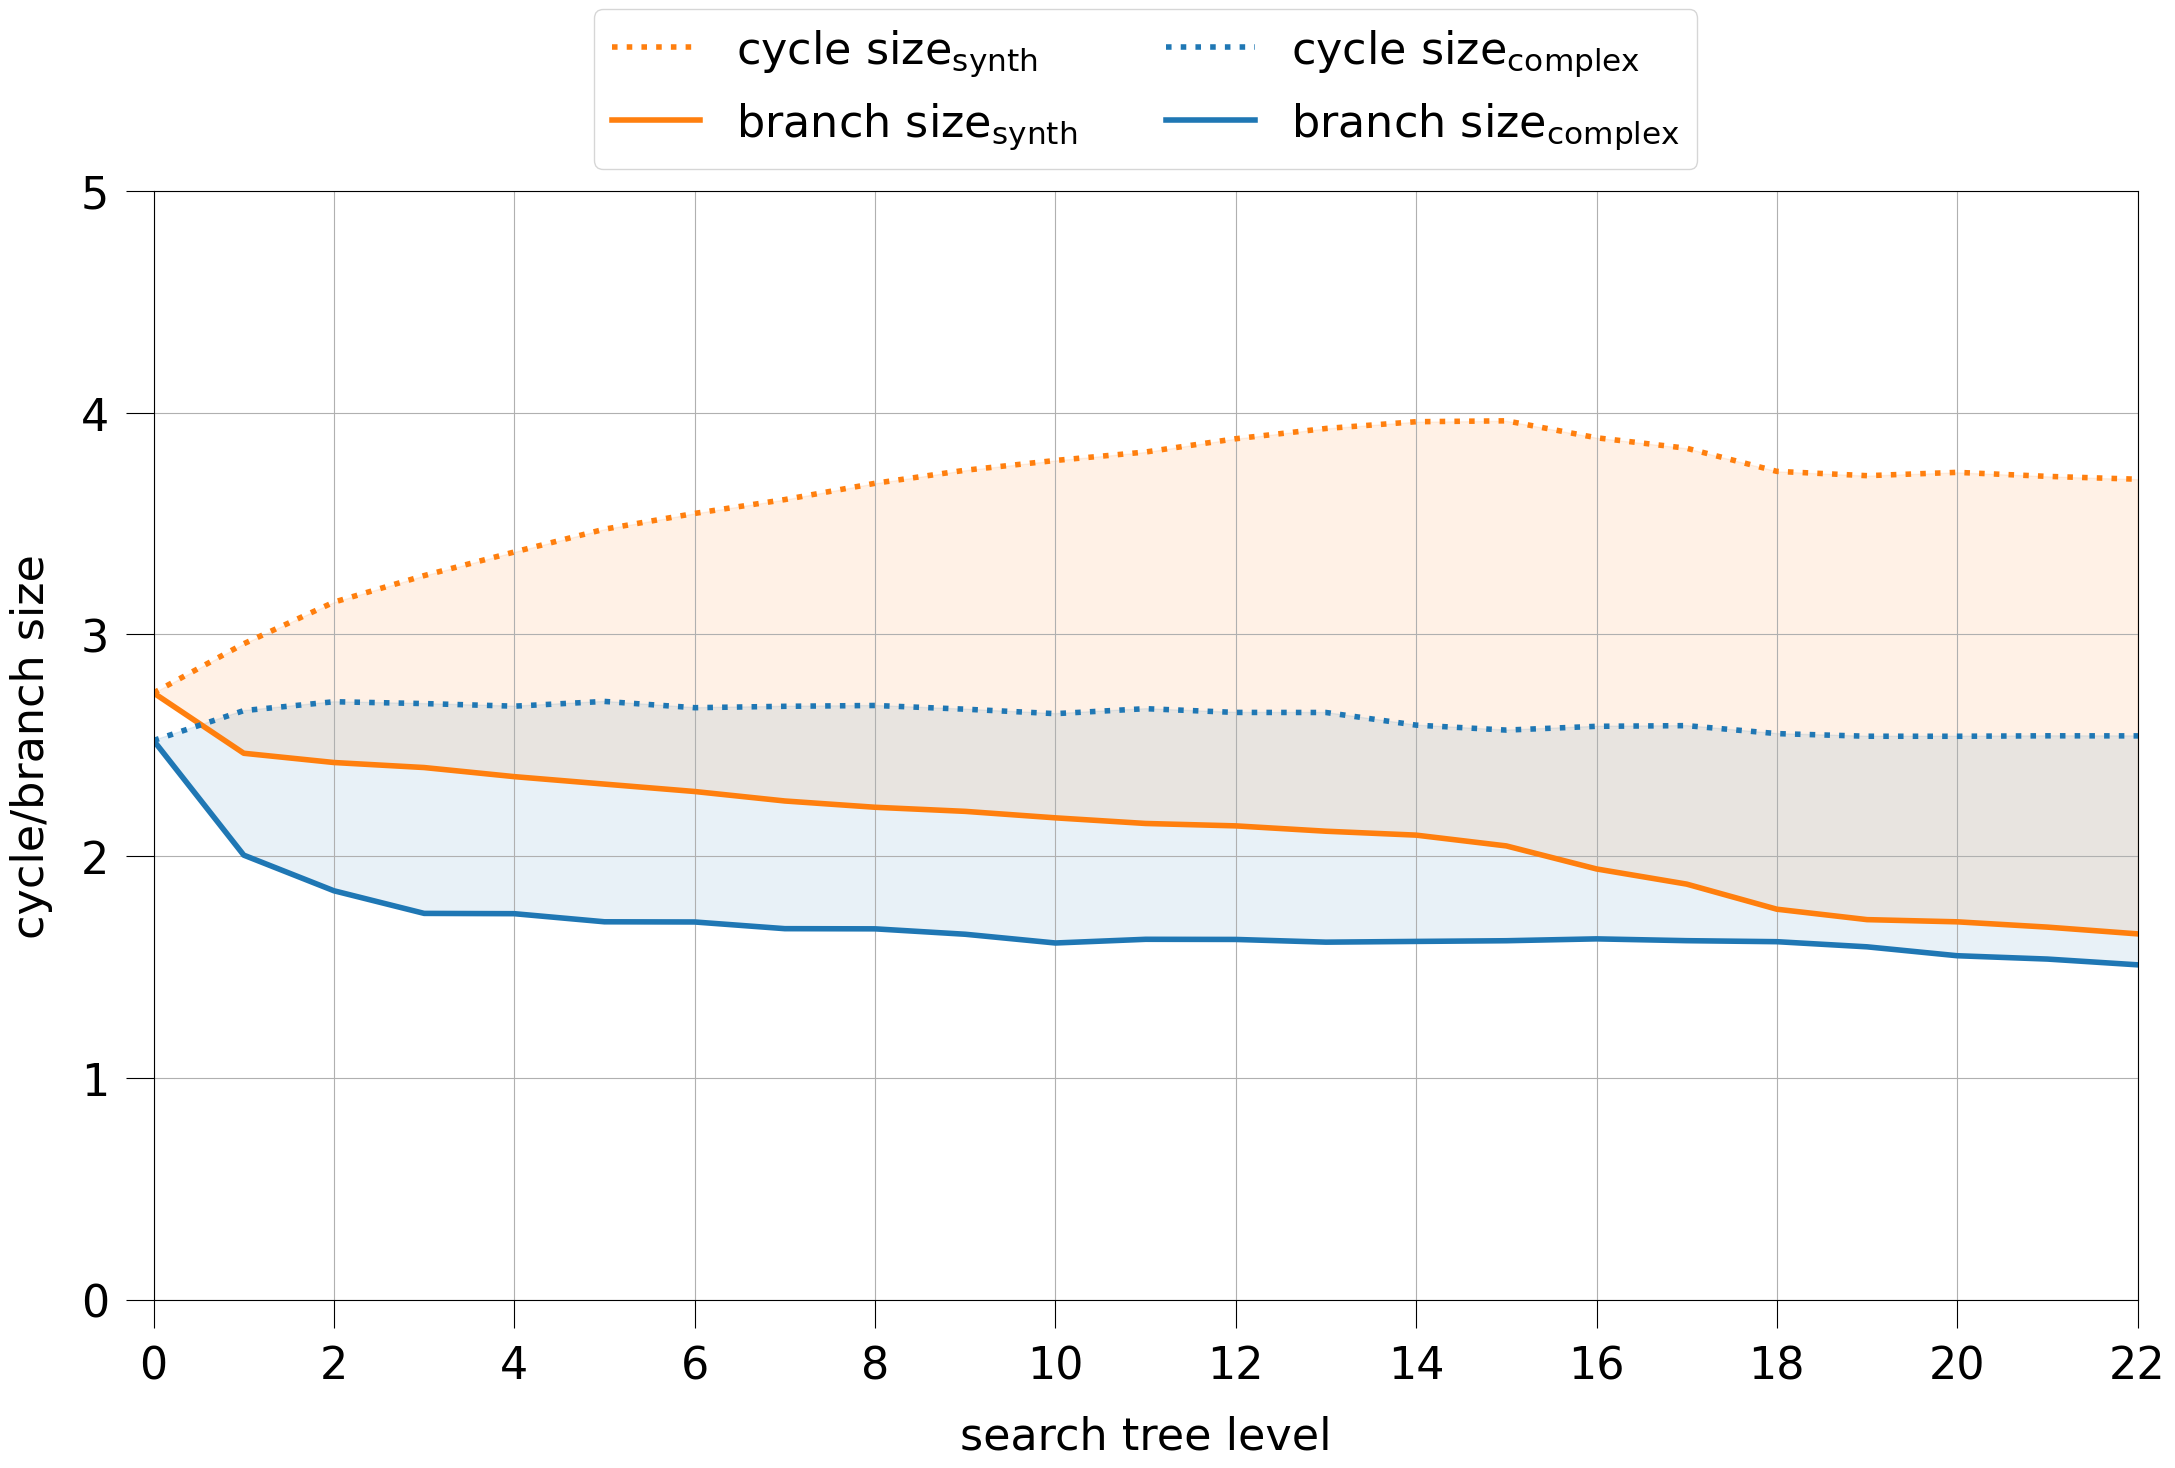

In [48]:
df_L_detail_synthetic, df_L_detail_complex = split_synthetic_complex(df_L_detail)
df_L_detail_synthetic_mean = df_L_detail_synthetic.groupby('level').mean()
df_L_detail_complex_mean = df_L_detail_complex.groupby('level').mean()

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_L_detail_synthetic_mean['cycle_size'], c='tab:orange', linestyle=':', linewidth='4', label='cycle $size_{synth}$')
ax.plot(df_L_detail_synthetic_mean['branch_size'], c='tab:orange', linewidth='4', label='branch $size_{synth}$')
ax.plot(df_L_detail_complex_mean['cycle_size'], c='tab:blue', linestyle=':', linewidth='4', label='cycle $size_{complex}$')
ax.plot(df_L_detail_complex_mean['branch_size'], c='tab:blue', linewidth='4', label='branch $size_{complex}$')
# Fill area between curves
ax.fill_between(df_L_detail_synthetic_mean.index, df_L_detail_synthetic_mean['cycle_size'], df_L_detail_synthetic_mean['branch_size'], color='tab:orange', alpha=0.1)
ax.fill_between(df_L_detail_complex_mean.index, df_L_detail_complex_mean['cycle_size'], df_L_detail_complex_mean['branch_size'], color='tab:blue', alpha=0.1)

ax.set_xlabel('search tree level', labelpad=20)
ax.set_ylabel('cycle/branch size', labelpad=20)
ax.set_xlim([0, 22])
ax.set_ylim([0, 5])
ax.set_xticks([0, 2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=2)

fig.savefig('plots/v2/LinePlotCycleVSBranchSize.png',  bbox_inches='tight')
fig.show()

# Line Plot BFS

In [1]:
# Calculate percentage dataframes
df_L_perc = get_percentage_df(df_L)
df_F_perc = get_percentage_df(df_F)
df_F2_perc = get_percentage_df(df_F2)

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_L_perc['percentage_solved'], c='tab:orange', linewidth='4', label='light bfs')
ax.plot(df_F_perc['percentage_solved'], c='tab:blue', linewidth='4', label='full bfs')
ax.plot(df_F2_perc['percentage_solved'], c='mediumorchid', linewidth='4', label='full bfs +')

L_text = str(df_L[df_L['verified'] == True].shape[0]) + "/" + str(df_L.shape[0])
F_text = str(df_F[df_F['verified'] == True].shape[0]) + "/" + str(df_F.shape[0])
F2_text = str(df_F2[df_F2['verified'] == True].shape[0]) + "/" + str(df_F2.shape[0])
L_perc = df_L[df_L['verified'] == True].shape[0] / df_L.shape[0]
F_perc = df_F[df_F['verified'] == True].shape[0] / df_F.shape[0]
F2_perc = df_F2[df_F2['verified'] == True].shape[0] / df_F2.shape[0]

ax.annotate(L_text, xy=(180000, L_perc), xycoords='data', xytext=(10000, 0.3), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=2, color='tab:orange'))
ax.annotate(F_text, xy=(180000, F_perc), xycoords='data', xytext=(4000, 0.45), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=2, color='tab:blue'))
ax.annotate(F2_text, xy=(180000, F2_perc), xycoords='data', xytext=(2000, 0.6), textcoords='data',
            arrowprops=dict(arrowstyle="->", connectionstyle="arc3", linewidth=2, color='mediumorchid'))

ax.set_xlabel('time in seconds', labelpad=20)
ax.set_ylabel('% instances solved', labelpad=20)
ax.set_xlim([1, 240000])
ax.set_ylim([0, 1.05])
ax.set_xscale('log')
ax.set_xticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_xticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=3)

# Draw
ax.axvline(x=180000, color='gray', linestyle='--', linewidth=3)
ax.axhline(y=1, color='gray', linestyle='--', linewidth=3)
ax.text(135000, 0.42, "timeout", color='gray', rotation='vertical')

fig.savefig('plots/v2/LinePlotBFS.png',  bbox_inches='tight')
fig.show()


NameError: name 'get_percentage_df' is not defined

# Line Plot BFS Branch Size

C:\Users\lenna\AppData\Local\Temp/ipykernel_8372/117603096.py:21: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


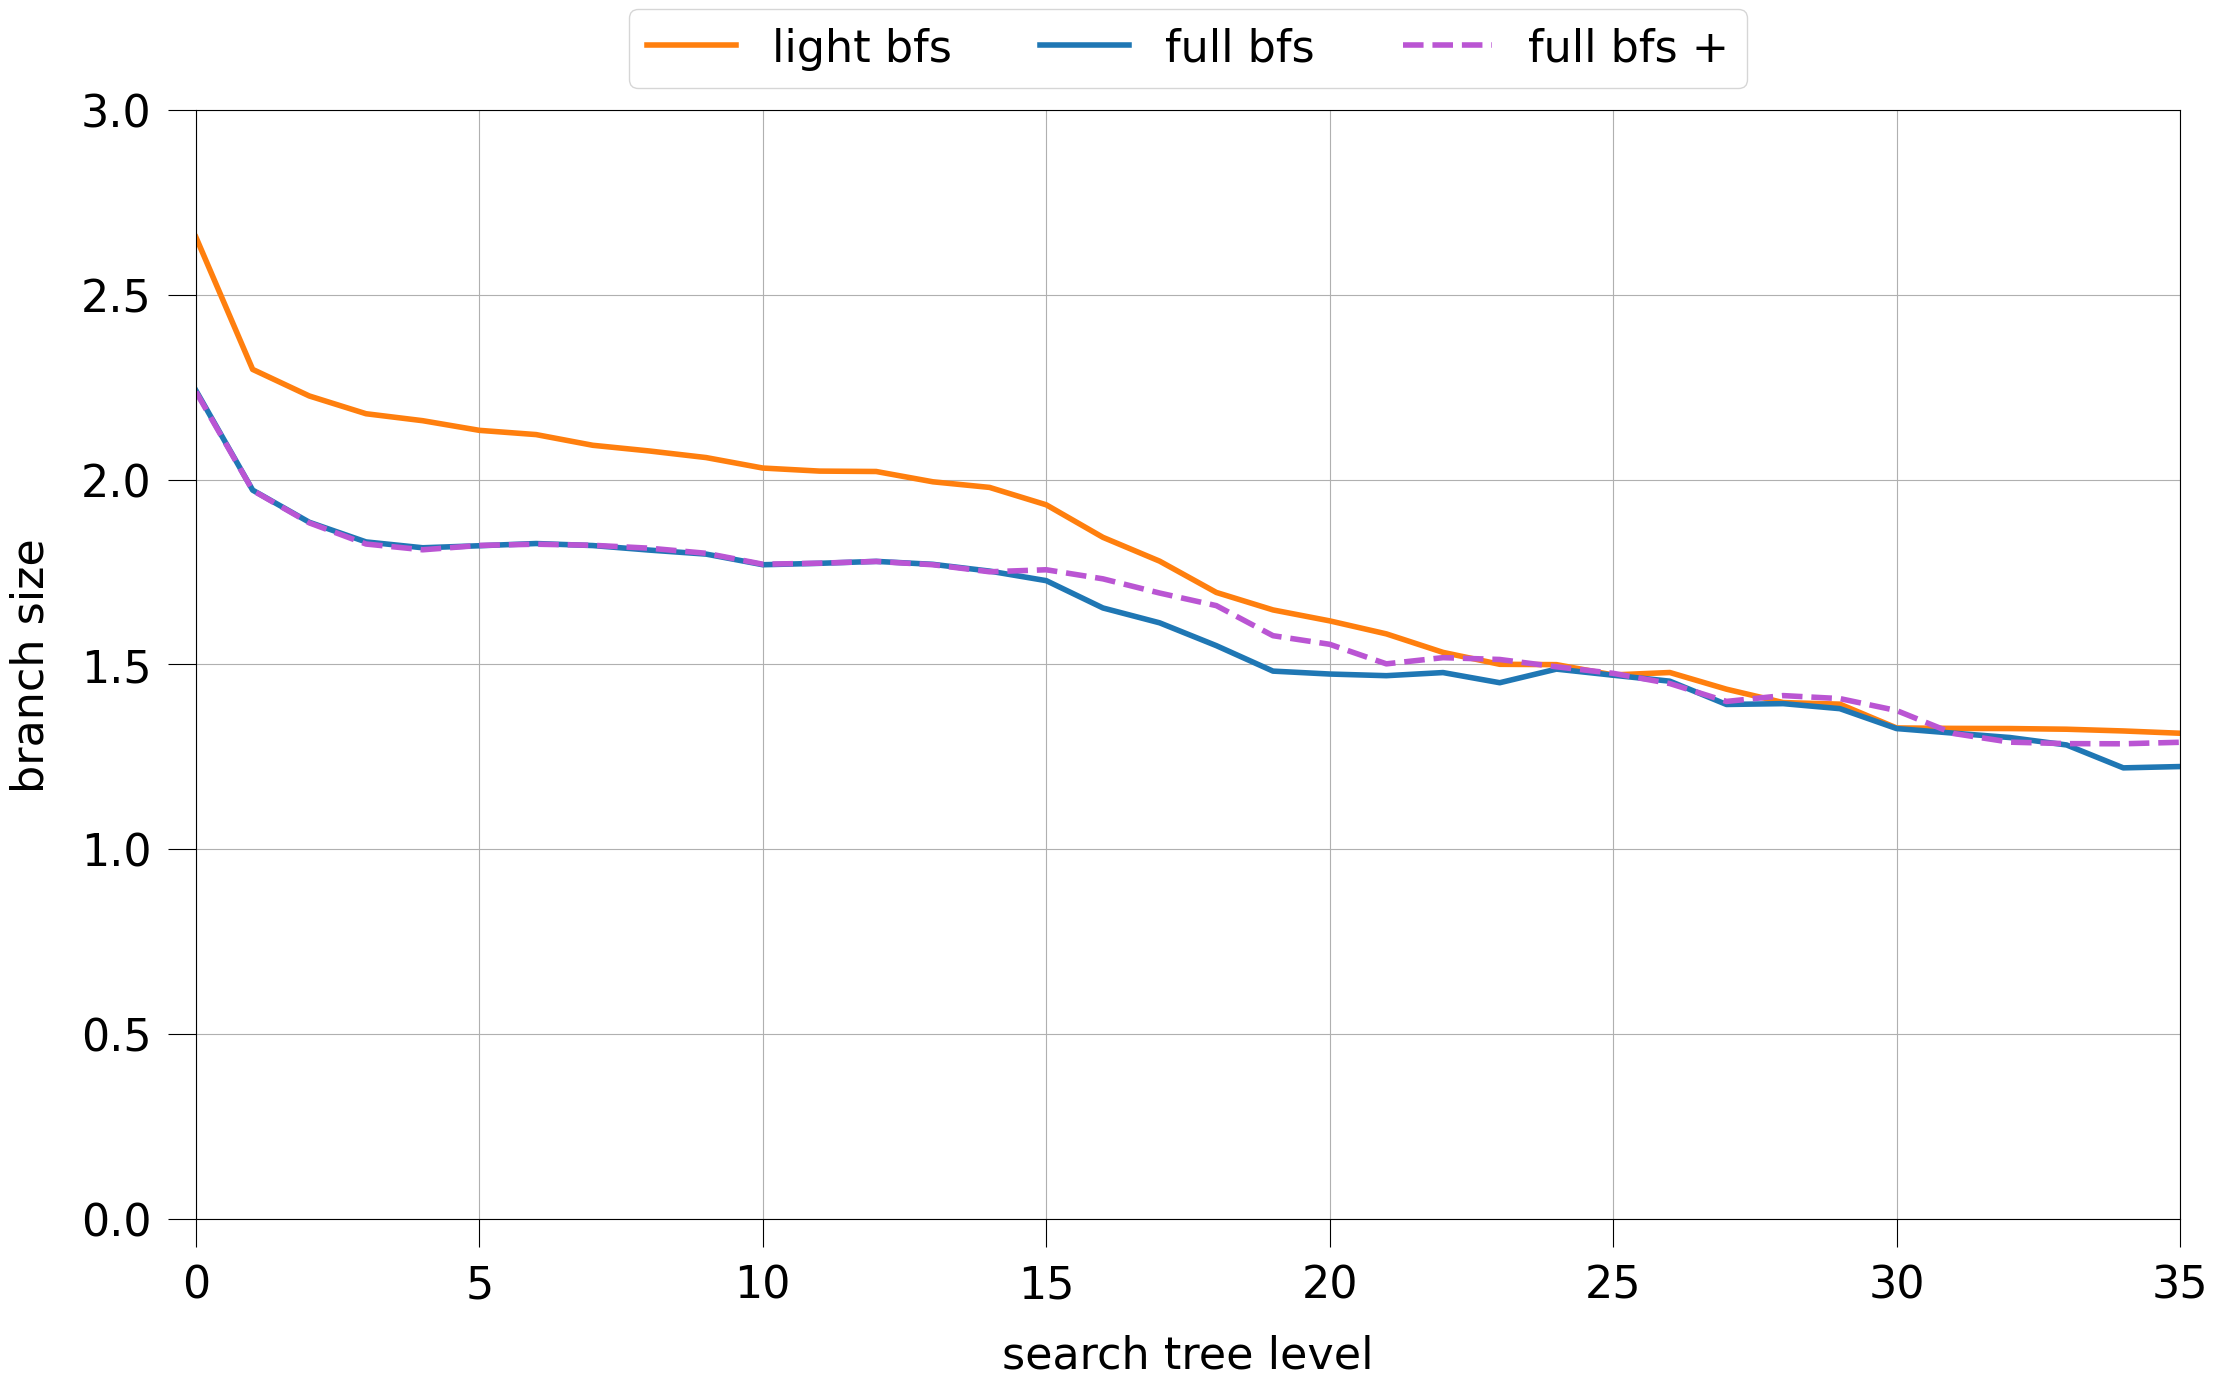

In [50]:
df_L_detail_mean = df_L_detail.groupby('level').mean()
df_F_detail_mean = df_F_detail.groupby('level').mean()
df_F2_detail_mean = df_F2_detail.groupby('level').mean()

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
ax.plot(df_L_detail_mean['branch_size'], c='tab:orange', linewidth='4', label='light bfs')
ax.plot(df_F_detail_mean['branch_size'], c='tab:blue', linewidth='4', label='full bfs')
ax.plot(df_F2_detail_mean['branch_size'], c='mediumorchid', linestyle='dashed', linewidth='4', label='full bfs +')

ax.set_xlabel('search tree level', labelpad=20)
ax.set_ylabel('branch size', labelpad=20)
ax.set_xlim([0, 35])
ax.set_ylim([0, 3])
ax.set_xticks([0, 5, 10, 15, 20, 25, 30, 35])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend(bbox_to_anchor=(0, 1, 1, 0), loc='lower center', ncol=3)

fig.savefig('plots/v2/LinePlotBFSBranchSize.png',  bbox_inches='tight')
fig.show()

# Box Plot Summary

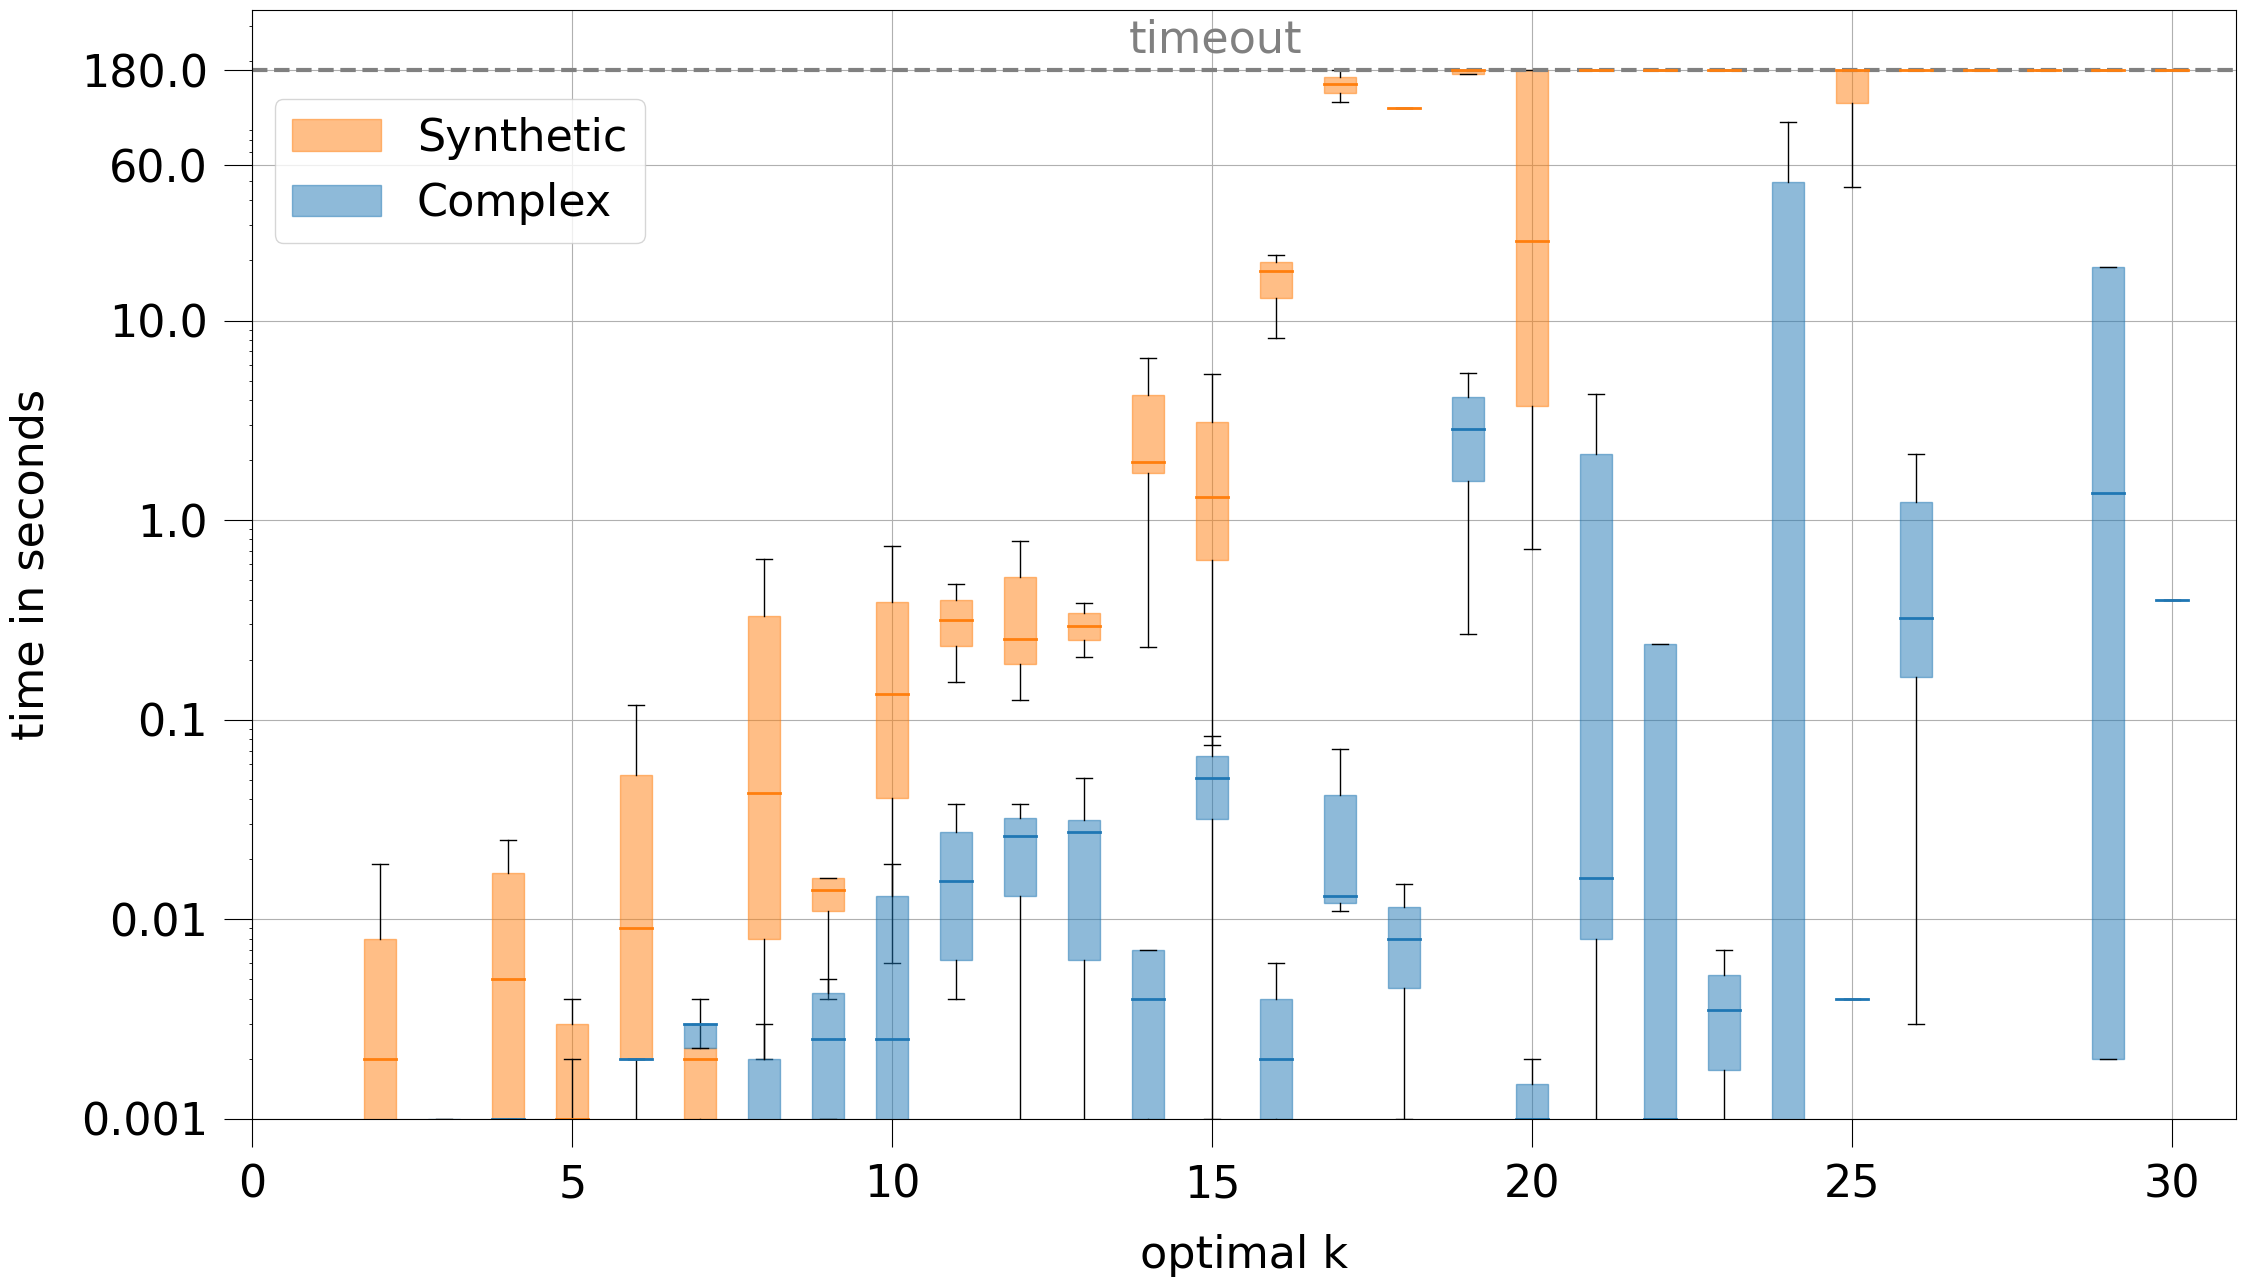

In [51]:
df_L_synthetic, df_L_complex = split_synthetic_complex(df_L)

box_size = 2
synthetic_data = []
complex_data = []
synthetic_positions = []
complex_positions = []
labels = [0]
for i in range(1, 31):
    upper_k = i
    lower_k = upper_k

    df_filter = df_L_synthetic[df_L_synthetic['k_optimal'] == upper_k]
    df_filter.append(df_L_synthetic[df_L_synthetic['k_optimal'] == lower_k])
    synthetic_data.append(list(df_filter['millis']))
    synthetic_positions.append(upper_k)

    df_filter = df_L_complex[df_L_complex['k_optimal'] == upper_k]
    df_filter.append(df_L_complex[df_L_complex['k_optimal'] == lower_k])
    complex_data.append(list(df_filter['millis']))
    complex_positions.append(upper_k)

left_data = [[1, 2, 5], [5, 7, 2, 2, 5], [7, 2, 5, 4]]
right_data = [[6, 4, 2], [1, 2, 5, 6, 2], [2, 3, 5, 1]]
left_positions = [-0.3, 1.6, 3.6]
right_positions = [0.3, 2.4, 4.4]

# Plot lines
fig, ax = plt.subplots(figsize=(25.6, 14.4))
bp1 = ax.boxplot(synthetic_data, positions = synthetic_positions, patch_artist=True, medianprops=dict(color='tab:orange', linewidth=2), boxprops=dict(facecolor='tab:orange', color='tab:orange', alpha=0.5), showfliers=False)
bp2 = ax.boxplot(complex_data, positions = complex_positions, patch_artist=True, medianprops=dict(color='tab:blue', linewidth=2), boxprops=dict(facecolor='tab:blue', color='tab:blue', alpha=0.5), showfliers=False)
ax.set_xlabel('optimal k', labelpad=20)
ax.set_ylabel('time in seconds', labelpad=20)
ax.set_xlim([0, 31])
ax.set_ylim([1, 360000])
ax.set_yscale('log')
ax.set_xticks([0, 5, 10, 15, 20, 25, 30])
ax.set_xticklabels([0, 5, 10, 15, 20, 25, 30])
ax.set_yticks([1, 10, 100, 1000, 10000, 60000, 180000])
ax.set_yticklabels([0.001, 0.01, 0.1, 1.0, 10.0, 60.0, 180.0])
ax.tick_params(axis='both', length=20, which='major', pad=12)
ax.grid()
ax.legend([bp1["boxes"][0], bp2["boxes"][0]], ['Synthetic', 'Complex'], bbox_to_anchor=(0, 0.94, 1, 0))

# Draw
ax.axhline(y=180000, color='gray', linestyle='--', linewidth=3)
ax.text(13.7, 220000, "timeout", color='gray')

fig.savefig('plots/v2/BoxPlotSummary.png',  bbox_inches='tight')


#ax = df_L.boxplot(column='millis', by='k_optimal', color='tab:orange', figsize=(25.6, 14.4), patch_artist='True')

#ax.set_yscale('log')
#

